In [2]:
%pip install -U numpy pandas matplotlib seaborn scikit-learn ipython


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import seaborn as sns
import os
import pandas as pd
import numpy as np
np.random.seed(1337)
from IPython.display import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [17]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows=50

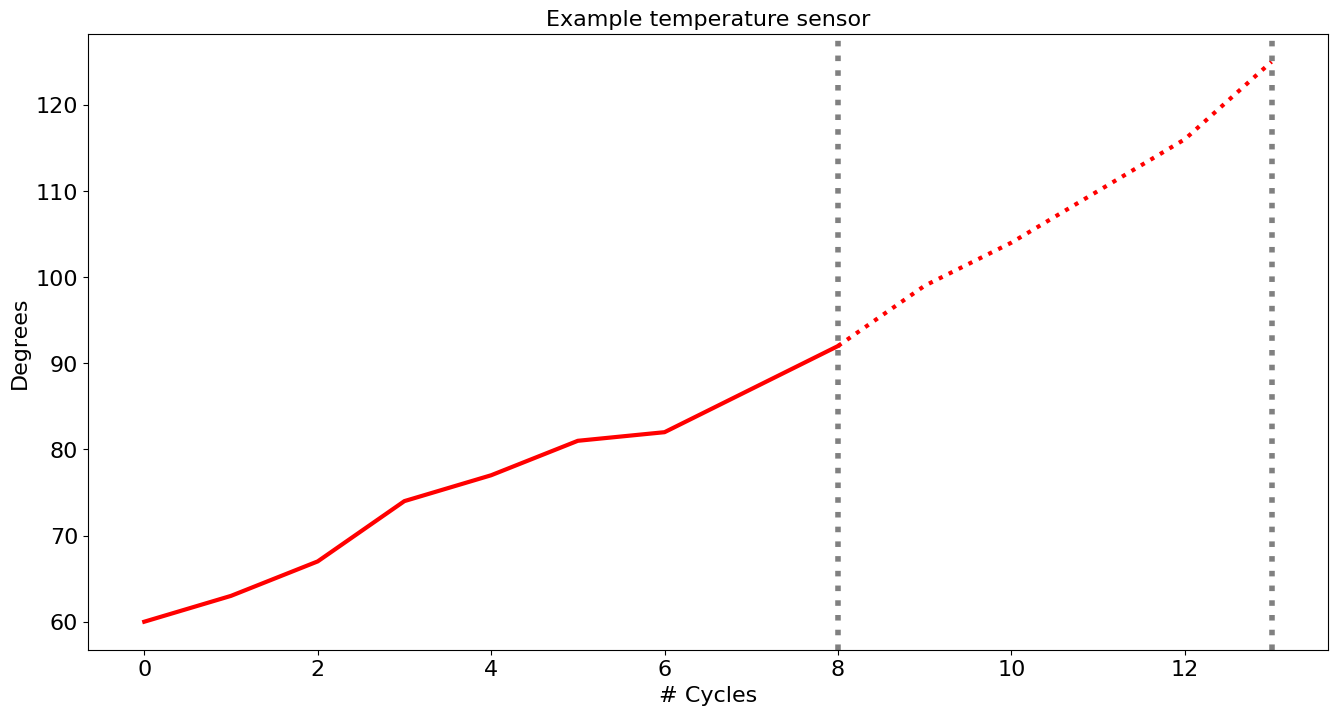

In [5]:
A=[60,63,67,74,77,81,82,87,92]
B=[92,99,104,110,116,125]
C = np.append(np.repeat(np.nan, len(A)-1), B)
plt.figure(figsize = (16, 8))
plt.plot(A, color='red', linewidth=3)
plt.plot(C, 'r:', linewidth=3)
plt.axvline(x=len(A)-1, color='grey', linestyle=':', linewidth=4)
plt.axvline(x=len(C)-1, color='grey', linestyle=':', linewidth=4)
plt.title('Example temperature sensor', fontsize=16)
plt.xlabel('# Cycles', fontsize=16)
plt.ylabel('Degrees', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [2]:
cols = ["unit","cycles","op_setting1","op_setting2","op_setting3"] + [f"s{i}" for i in range(1, 22)]

train = pd.read_csv("data/train_FD001.txt", sep=r"\s+", header=None, names=cols).dropna(axis=1, how="all")
test  = pd.read_csv("data/test_FD001.txt",  sep=r"\s+", header=None, names=cols).dropna(axis=1, how="all")
RUL   = pd.read_csv("data/RUL_FD001.txt",   sep=r"\s+", header=None, names=["RUL"])


In [7]:
print(train.shape)
print(list(train.columns))

(20631, 26)
['unit', 'cycles', 'op_setting1', 'op_setting2', 'op_setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']


In [9]:
train.isna().sum()

unit           0
cycles         0
op_setting1    0
op_setting2    0
op_setting3    0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
s7             0
s8             0
s9             0
s10            0
s11            0
s12            0
s13            0
s14            0
s15            0
s16            0
s17            0
s18            0
s19            0
s20            0
s21            0
dtype: int64

In [22]:
train.head()

unit  cycles  op_setting1  op_setting2  op_setting3      s1      s2  \
0     1       1       -0.001       -0.000      100.000 518.670 641.820   
1     1       2        0.002       -0.000      100.000 518.670 642.150   
2     1       3       -0.004        0.000      100.000 518.670 642.350   
3     1       4        0.001        0.000      100.000 518.670 642.350   
4     1       5       -0.002       -0.000      100.000 518.670 642.370   

        s3       s4     s5  ...     s12      s13      s14   s15   s16  s17  \
0 1589.700 1400.600 14.620  ... 521.660 2388.020 8138.620 8.419 0.030  392   
1 1591.820 1403.140 14.620  ... 522.280 2388.070 8131.490 8.432 0.030  392   
2 1587.990 1404.200 14.620  ... 522.420 2388.030 8133.230 8.418 0.030  390   
3 1582.790 1401.870 14.620  ... 522.860 2388.080 8133.830 8.368 0.030  392   
4 1582.850 1406.220 14.620  ... 522.190 2388.040 8133.800 8.429 0.030  393   

    s18     s19    s20    s21  
0  2388 100.000 39.060 23.419  
1  2388 100.000 39.000 23.424  
2  2388 100.000 38.950 23.344  
3  2388 100.000 38.880 23.374  
4  2388 100.000 38.900 23.404  

[5 rows x 26 columns]

In [23]:
train.tail()

unit  cycles  op_setting1  op_setting2  op_setting3      s1      s2  \
20626   100     196       -0.000       -0.000      100.000 518.670 643.490   
20627   100     197       -0.002       -0.001      100.000 518.670 643.540   
20628   100     198        0.000        0.000      100.000 518.670 643.420   
20629   100     199       -0.001        0.000      100.000 518.670 643.230   
20630   100     200       -0.003       -0.001      100.000 518.670 643.850   

            s3       s4     s5  ...     s12      s13      s14   s15   s16  \
20626 1597.980 1428.630 14.620  ... 519.490 2388.260 8137.600 8.496 0.030   
20627 1604.500 1433.580 14.620  ... 519.680 2388.220 8136.500 8.514 0.030   
20628 1602.460 1428.180 14.620  ... 520.010 2388.240 8141.050 8.565 0.030   
20629 1605.260 1426.530 14.620  ... 519.670 2388.230 8139.290 8.539 0.030   
20630 1600.380 1432.140 14.620  ... 519.300 2388.260 8137.330 8.504 0.030   

       s17   s18     s19    s20    s21  
20626  397  2388 100.000 38.490 22.974  
20627  395  2388 100.000 38.300 23.159  
20628  398  2388 100.000 38.440 22.933  
20629  395  2388 100.000 38.290 23.064  
20630  396  2388 100.000 38.370 23.052  

[5 rows x 26 columns]

In [24]:
print(test.shape)
print(list(test.columns))

(13096, 26)
['unit', 'cycles', 'op_setting1', 'op_setting2', 'op_setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']


In [25]:
test.isna().sum()

unit           0
cycles         0
op_setting1    0
op_setting2    0
op_setting3    0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
s7             0
s8             0
s9             0
s10            0
s11            0
s12            0
s13            0
s14            0
s15            0
s16            0
s17            0
s18            0
s19            0
s20            0
s21            0
dtype: int64

In [26]:
test.head()

unit  cycles  op_setting1  op_setting2  op_setting3      s1      s2  \
0     1       1        0.002        0.000      100.000 518.670 643.020   
1     1       2       -0.003       -0.000      100.000 518.670 641.710   
2     1       3        0.000        0.000      100.000 518.670 642.460   
3     1       4        0.004        0.000      100.000 518.670 642.440   
4     1       5        0.001        0.000      100.000 518.670 642.510   

        s3       s4     s5  ...     s12      s13      s14   s15   s16  s17  \
0 1585.290 1398.210 14.620  ... 521.720 2388.030 8125.550 8.405 0.030  392   
1 1588.450 1395.420 14.620  ... 522.160 2388.060 8139.620 8.380 0.030  393   
2 1586.940 1401.340 14.620  ... 521.970 2388.030 8130.100 8.444 0.030  393   
3 1584.120 1406.420 14.620  ... 521.380 2388.050 8132.900 8.392 0.030  391   
4 1587.190 1401.920 14.620  ... 522.150 2388.030 8129.540 8.403 0.030  390   

    s18     s19    s20    s21  
0  2388 100.000 38.860 23.373  
1  2388 100.000 39.020 23.392  
2  2388 100.000 39.080 23.417  
3  2388 100.000 39.000 23.374  
4  2388 100.000 38.990 23.413  

[5 rows x 26 columns]

In [27]:
test.tail()

unit  cycles  op_setting1  op_setting2  op_setting3      s1      s2  \
13091   100     194        0.005        0.000      100.000 518.670 643.240   
13092   100     195       -0.001       -0.000      100.000 518.670 643.220   
13093   100     196       -0.001       -0.000      100.000 518.670 643.440   
13094   100     197       -0.004        0.000      100.000 518.670 643.260   
13095   100     198        0.001        0.000      100.000 518.670 642.950   

            s3       s4     s5  ...     s12      s13      s14   s15   s16  \
13091 1599.450 1415.790 14.620  ... 520.690 2388.000 8213.280 8.472 0.030   
13092 1595.690 1422.050 14.620  ... 521.050 2388.090 8210.850 8.451 0.030   
13093 1593.150 1406.820 14.620  ... 521.180 2388.040 8217.240 8.457 0.030   
13094 1594.990 1419.360 14.620  ... 521.330 2388.080 8220.480 8.471 0.030   
13095 1601.620 1424.990 14.620  ... 521.070 2388.050 8214.640 8.490 0.030   

       s17   s18     s19    s20    s21  
13091  394  2388 100.000 38.650 23.197  
13092  395  2388 100.000 38.570 23.277  
13093  395  2388 100.000 38.620 23.205  
13094  395  2388 100.000 38.660 23.270  
13095  396  2388 100.000 38.700 23.186  

[5 rows x 26 columns]

In [28]:
print(RUL.shape)
print(list(RUL.columns))

(100, 1)
['RUL']


In [29]:
RUL.isna().sum()

RUL    0
dtype: int64

In [30]:
RUL.head()

RUL
0  112
1   98
2   69
3   82
4   91

In [31]:
RUL.tail()

RUL
95  137
96   82
97   59
98  117
99   20

<Axes: xlabel='RUL', ylabel='Count'>

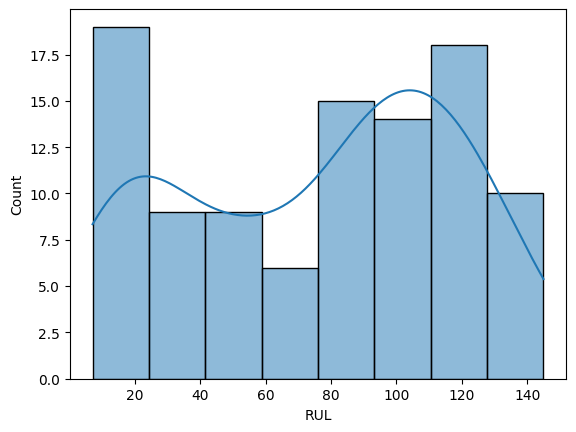

In [38]:
sns.histplot(RUL['RUL'],kde=True)

In [37]:
RUL['RUL'].describe()

count   100.000
mean     75.520
std      41.765
min       7.000
25%      32.750
50%      86.000
75%     112.250
max     145.000
Name: RUL, dtype: float64

In [19]:
train.describe().T

count     mean    std      min      25%      50%      75%  \
unit        20631.000   51.507 29.228    1.000   26.000   52.000   77.000   
cycles      20631.000  108.808 68.881    1.000   52.000  104.000  156.000   
op_setting1 20631.000   -0.000  0.002   -0.009   -0.002    0.000    0.002   
op_setting2 20631.000    0.000  0.000   -0.001   -0.000    0.000    0.000   
s2          20631.000  642.681  0.500  641.210  642.325  642.640  643.000   
s3          20631.000 1590.523  6.131 1571.040 1586.260 1590.100 1594.380   
s4          20631.000 1408.934  9.001 1382.250 1402.360 1408.040 1414.555   
s6          20631.000   21.610  0.001   21.600   21.610   21.610   21.610   
s7          20631.000  553.368  0.885  549.850  552.810  553.440  554.010   
s8          20631.000 2388.097  0.071 2387.900 2388.050 2388.090 2388.140   
s9          20631.000 9065.243 22.083 9021.730 9053.100 9060.660 9069.420   
s11         20631.000   47.541  0.267   46.850   47.350   47.510   47.700   
s12         20631.000  521.413  0.738  518.690  520.960  521.480  521.950   
s13         20631.000 2388.096  0.072 2387.880 2388.040 2388.090 2388.140   
s14         20631.000 8143.753 19.076 8099.940 8133.245 8140.540 8148.310   
s15         20631.000    8.442  0.038    8.325    8.415    8.439    8.466   
s17         20631.000  393.211  1.549  388.000  392.000  393.000  394.000   
s20         20631.000   38.816  0.181   38.140   38.700   38.830   38.950   
s21         20631.000   23.290  0.108   22.894   23.222   23.298   23.367   

                 max  
unit         100.000  
cycles       362.000  
op_setting1    0.009  
op_setting2    0.001  
s2           644.530  
s3          1616.910  
s4          1441.490  
s6            21.610  
s7           556.060  
s8          2388.560  
s9          9244.590  
s11           48.530  
s12          523.380  
s13         2388.560  
s14         8293.720  
s15            8.585  
s17          400.000  
s20           39.430  
s21           23.618

In [18]:
test.describe().T

count     mean    std      min      25%      50%      75%  \
unit        13096.000   51.544 28.289    1.000   28.000   52.000   76.000   
cycles      13096.000   76.837 53.058    1.000   33.000   69.000  113.000   
op_setting1 13096.000   -0.000  0.002   -0.008   -0.002   -0.000    0.002   
op_setting2 13096.000    0.000  0.000   -0.001   -0.000   -0.000    0.000   
s2          13096.000  642.475  0.401  641.130  642.197  642.460  642.740   
s3          13096.000 1588.099  5.003 1569.040 1584.600 1587.990 1591.362   
s4          13096.000 1404.735  6.688 1384.390 1399.950 1404.440 1409.050   
s6          13096.000   21.610  0.002   21.600   21.610   21.610   21.610   
s7          13096.000  553.758  0.681  550.880  553.310  553.800  554.240   
s8          13096.000 2388.071  0.057 2387.890 2388.030 2388.070 2388.110   
s9          13096.000 9058.407 11.436 9024.530 9051.020 9057.320 9064.110   
s11         13096.000   47.416  0.196   46.800   47.270   47.410   47.540   
s12         13096.000  521.748  0.560  519.380  521.380  521.780  522.150   
s13         13096.000 2388.071  0.057 2387.890 2388.030 2388.070 2388.110   
s14         13096.000 8138.948 10.189 8108.500 8132.310 8138.390 8144.360   
s15         13096.000    8.426  0.029    8.333    8.406    8.425    8.444   
s17         13096.000  392.572  1.234  389.000  392.000  393.000  393.000   
s20         13096.000   38.893  0.142   38.310   38.800   38.900   38.990   
s21         13096.000   23.336  0.084   22.935   23.282   23.339   23.394   

                 max  
unit         100.000  
cycles       303.000  
op_setting1    0.008  
op_setting2    0.001  
s2           644.300  
s3          1607.550  
s4          1433.360  
s6            21.610  
s7           555.840  
s8          2388.300  
s9          9155.030  
s11           48.260  
s12          523.760  
s13         2388.320  
s14         8220.480  
s15            8.541  
s17          397.000  
s20           39.410  
s21           23.642

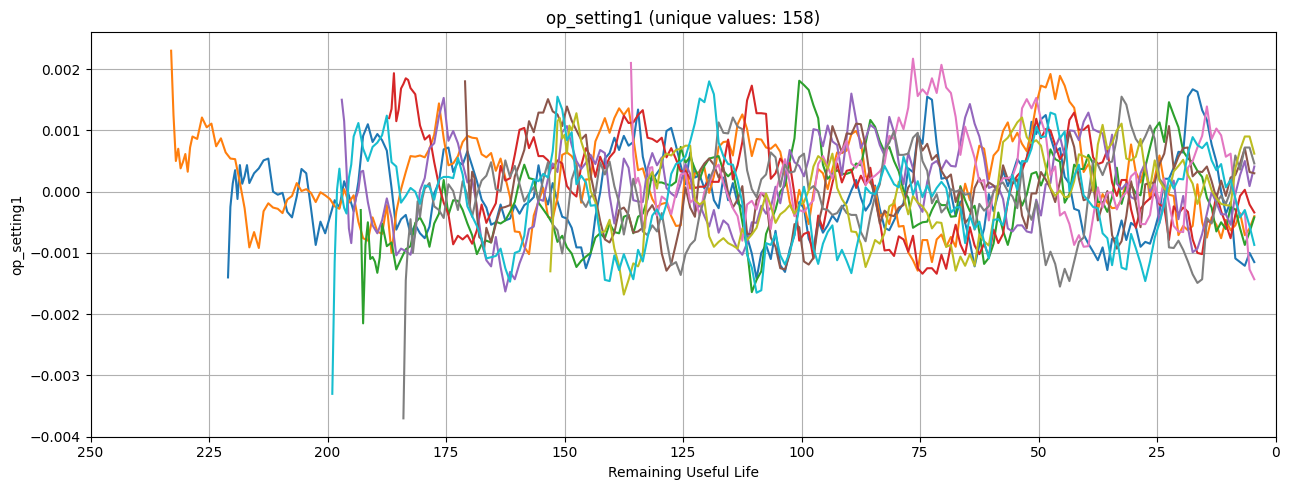

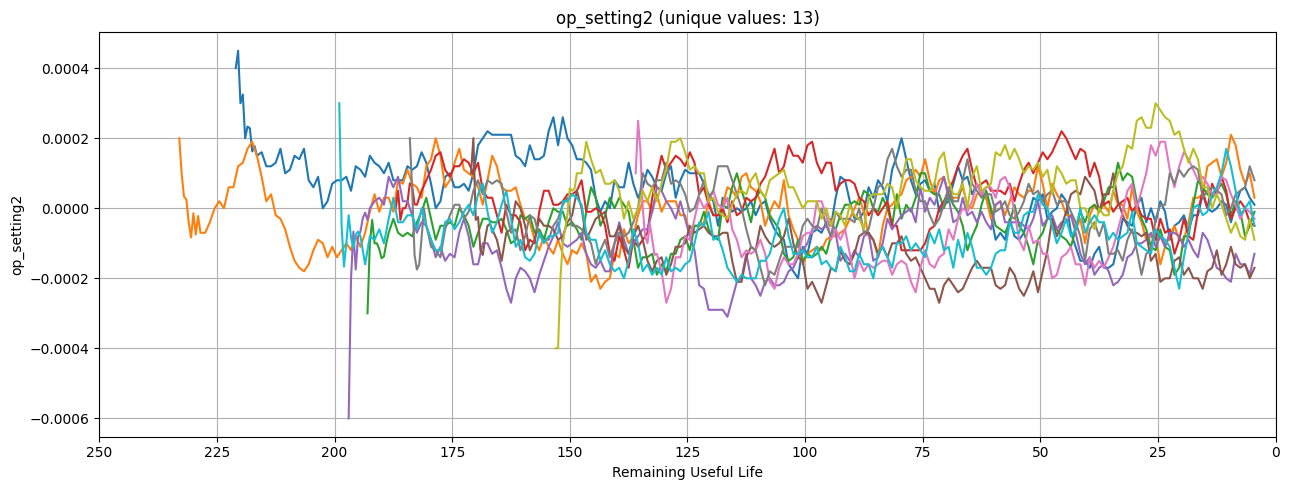

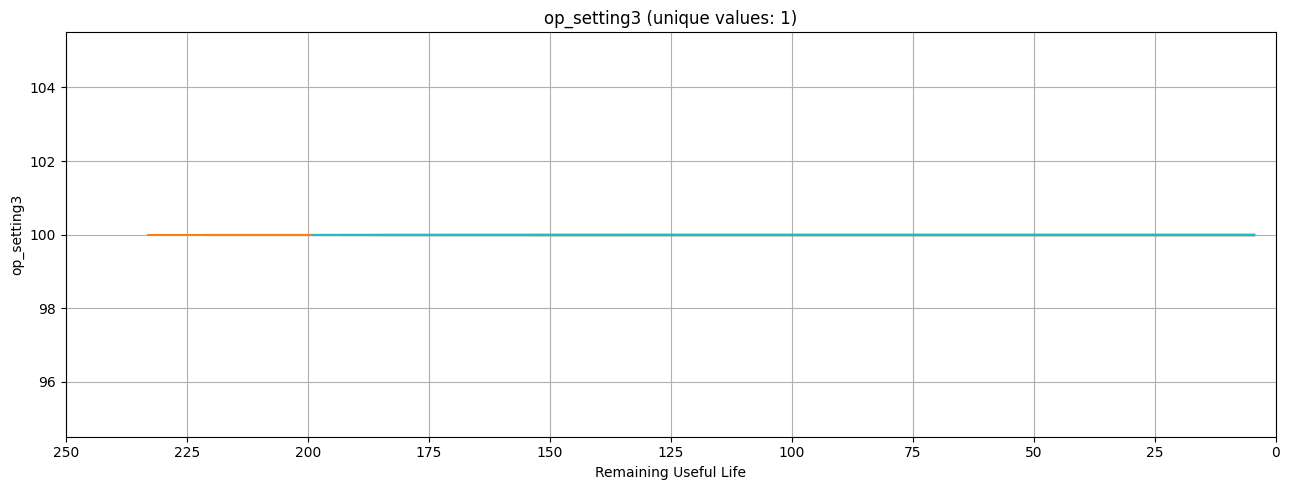

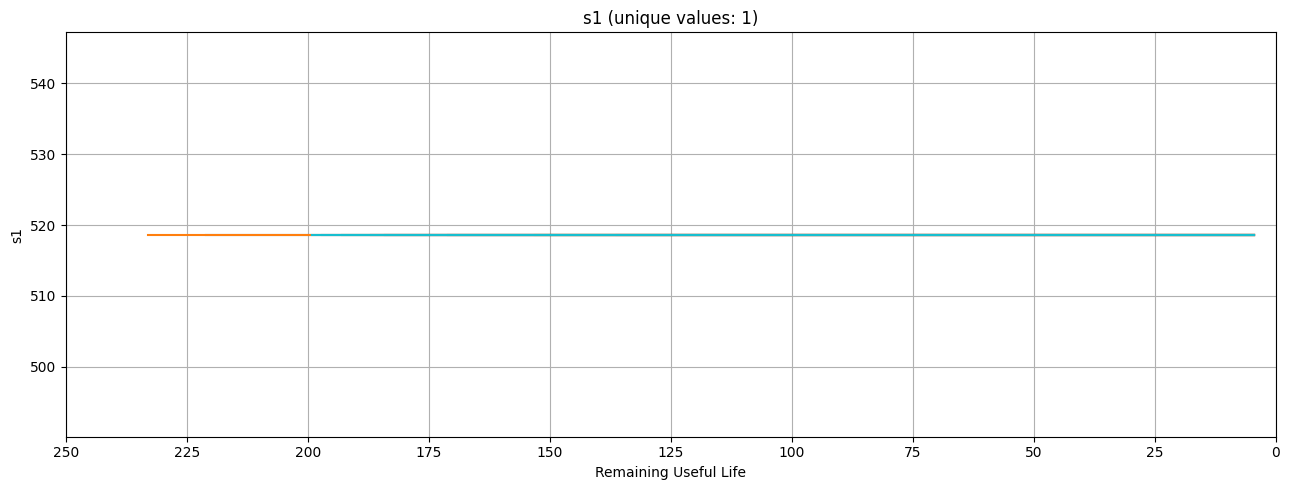

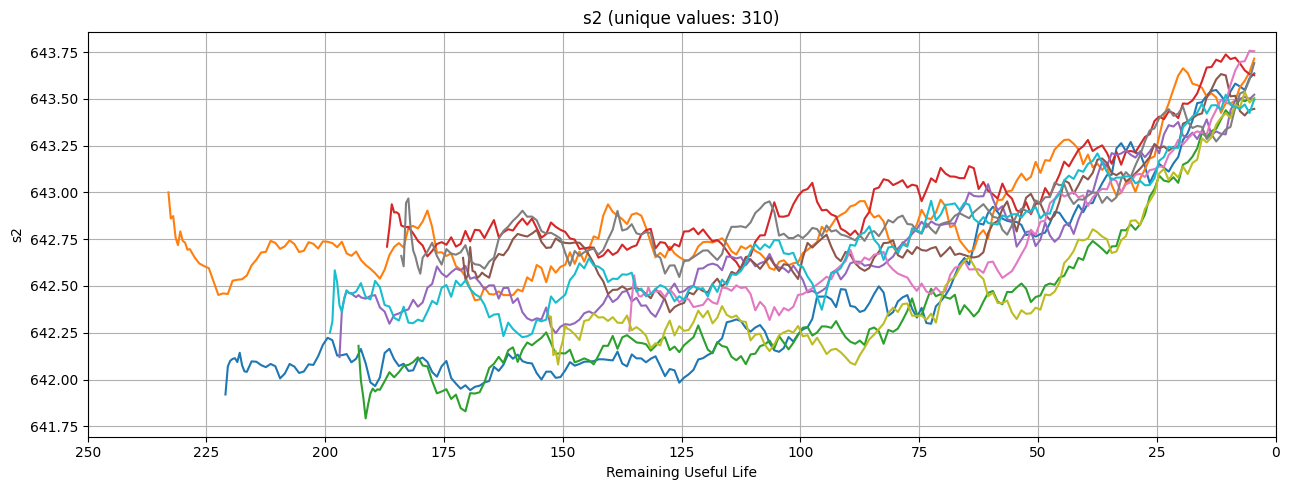

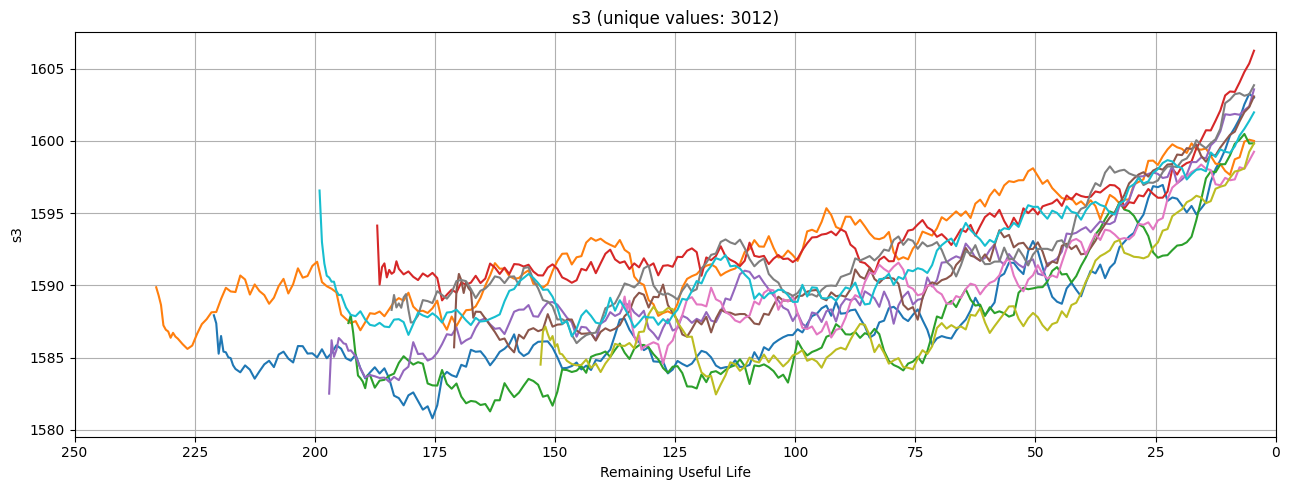

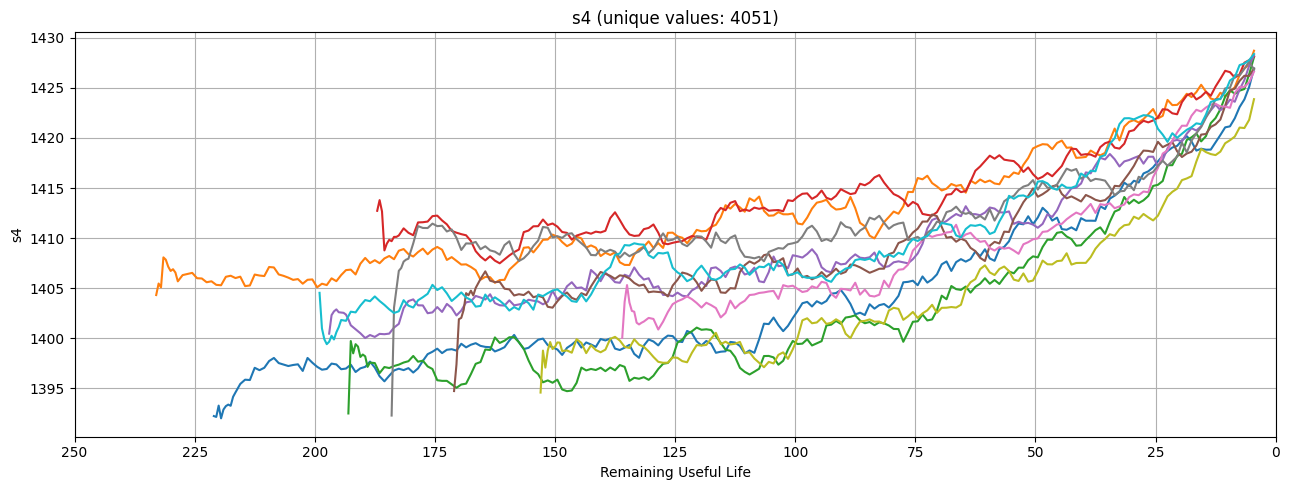

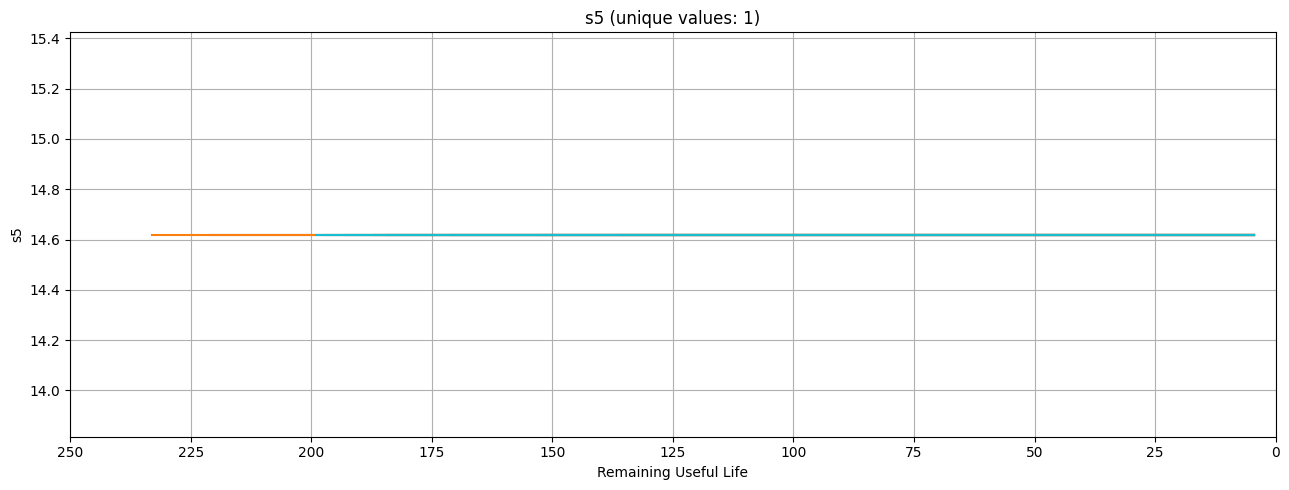

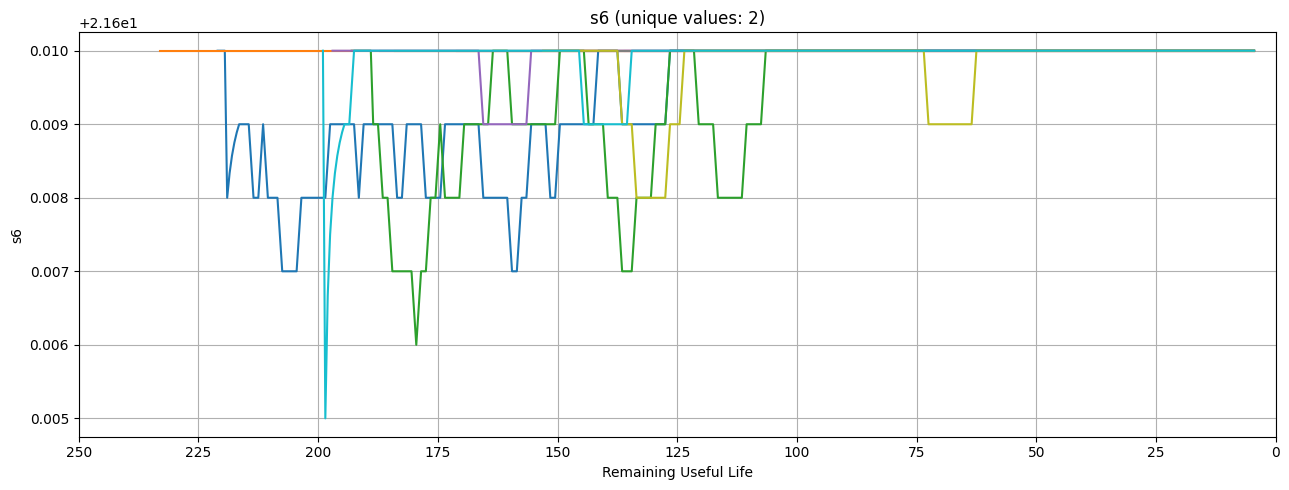

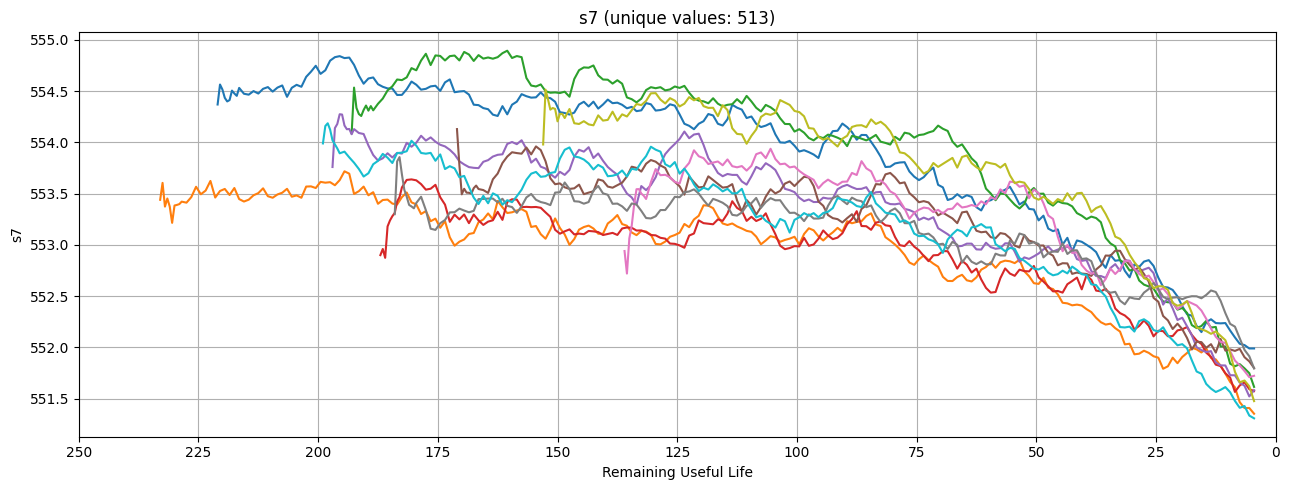

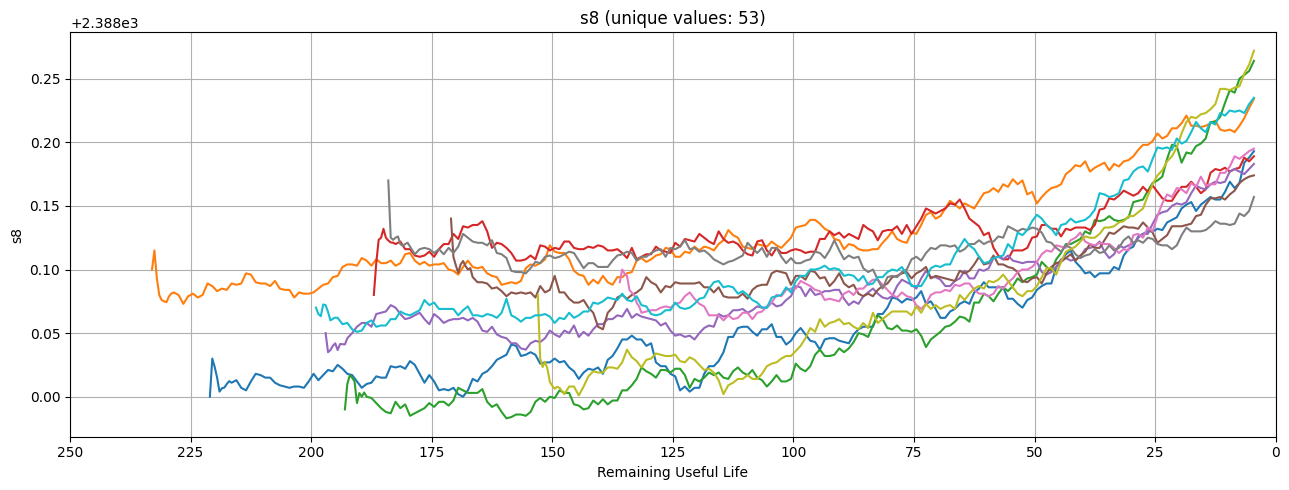

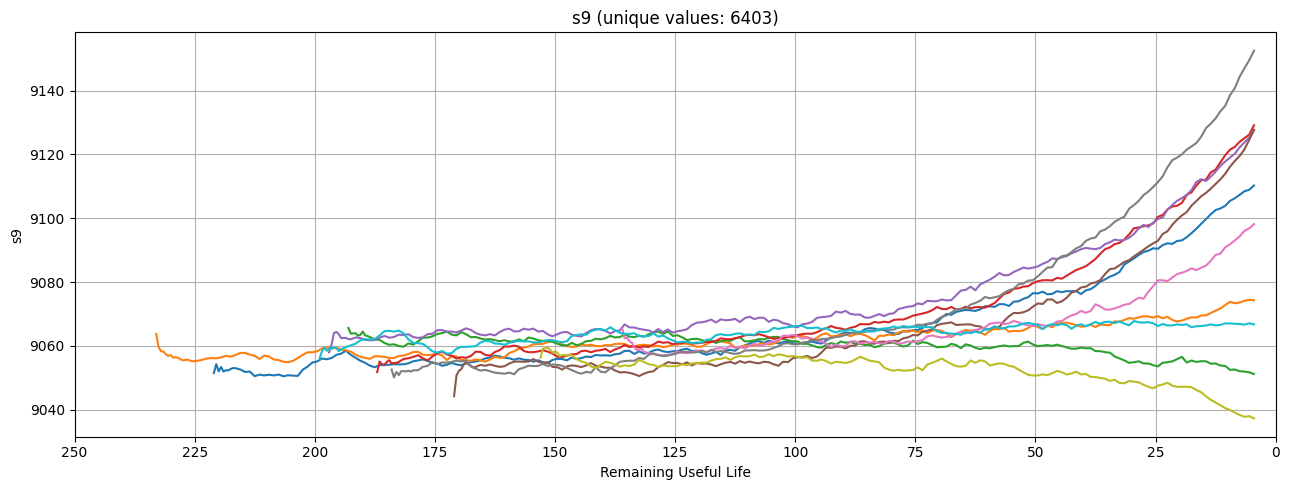

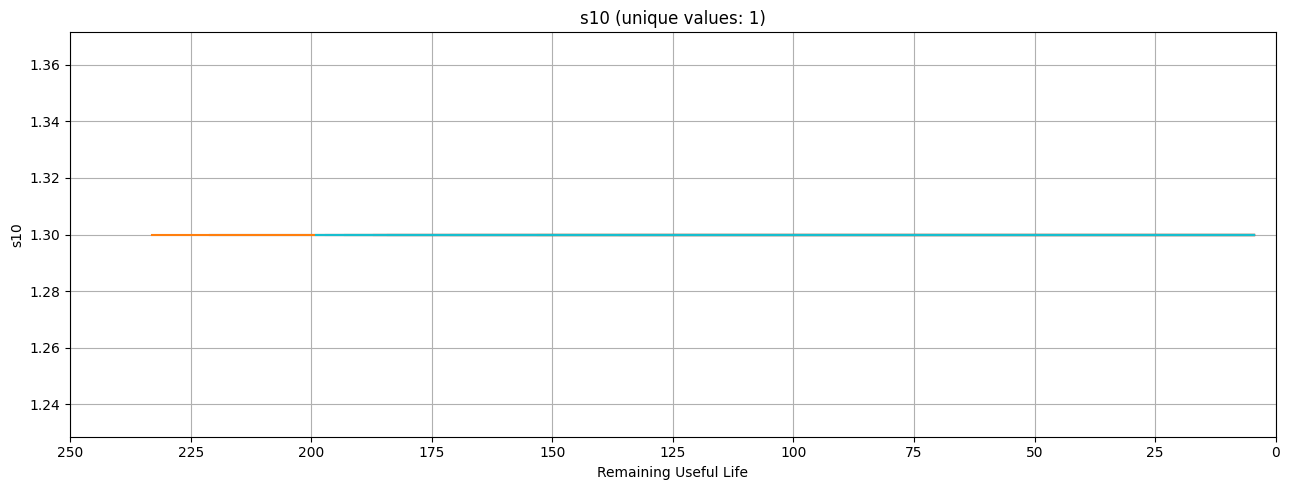

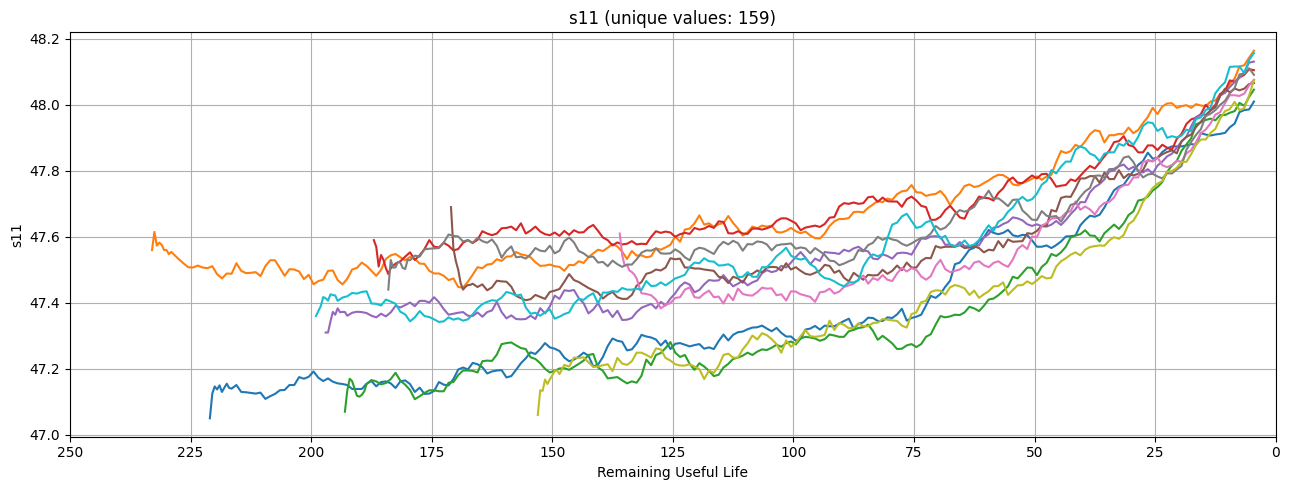

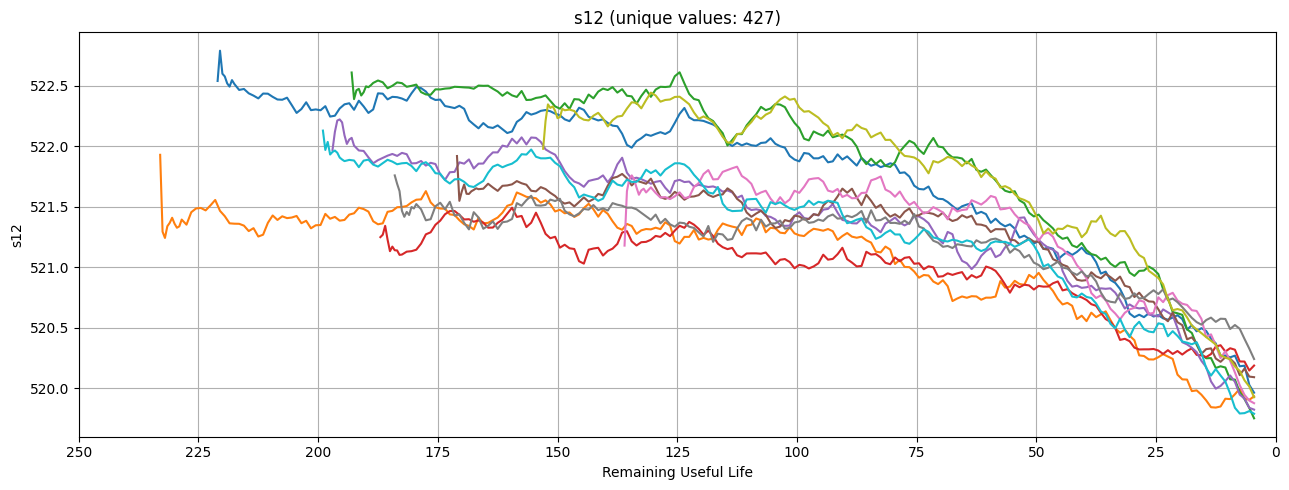

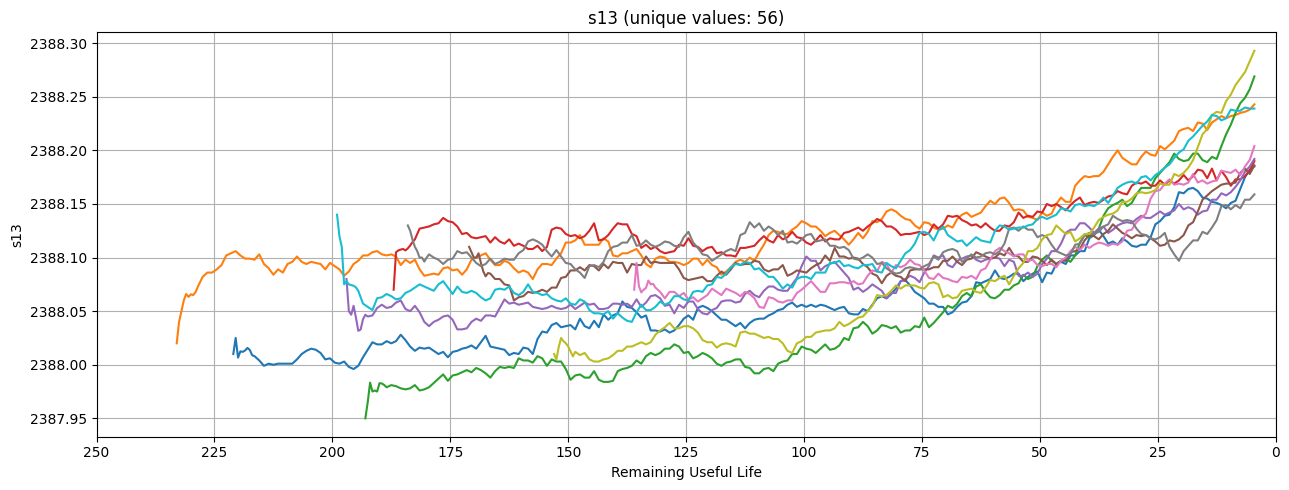

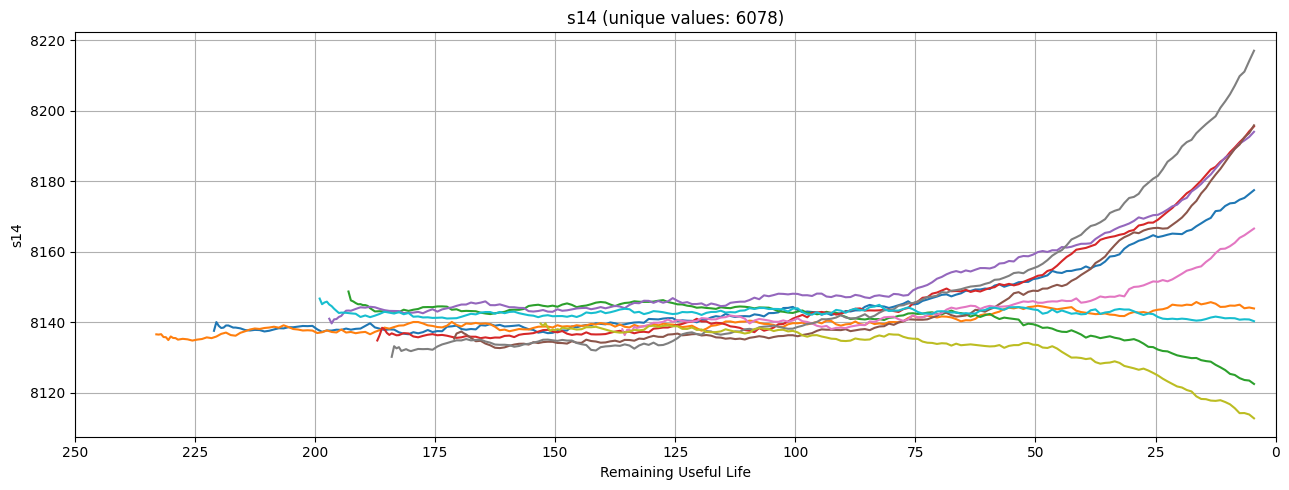

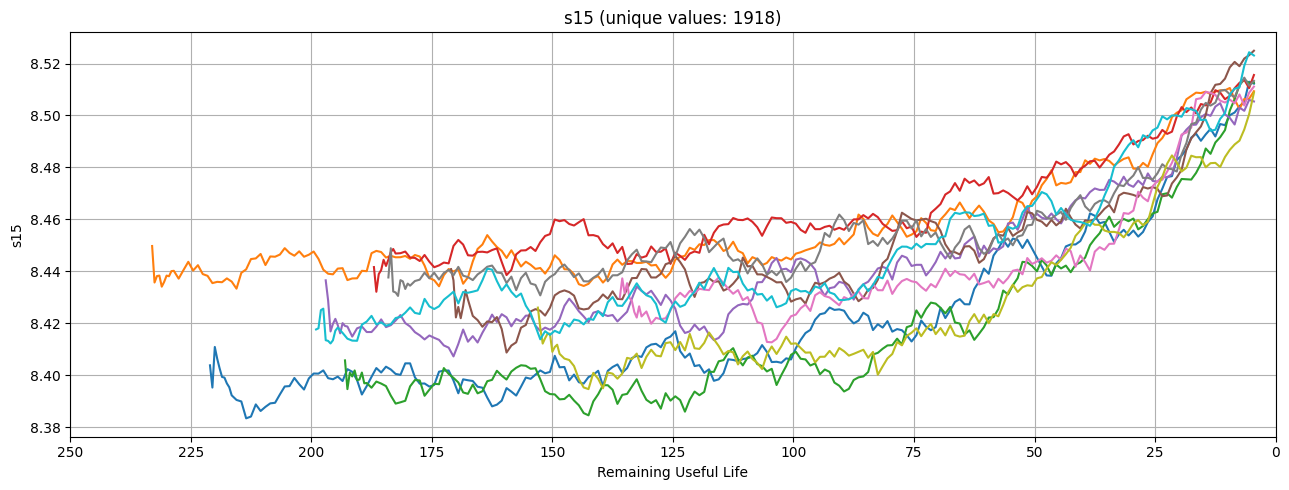

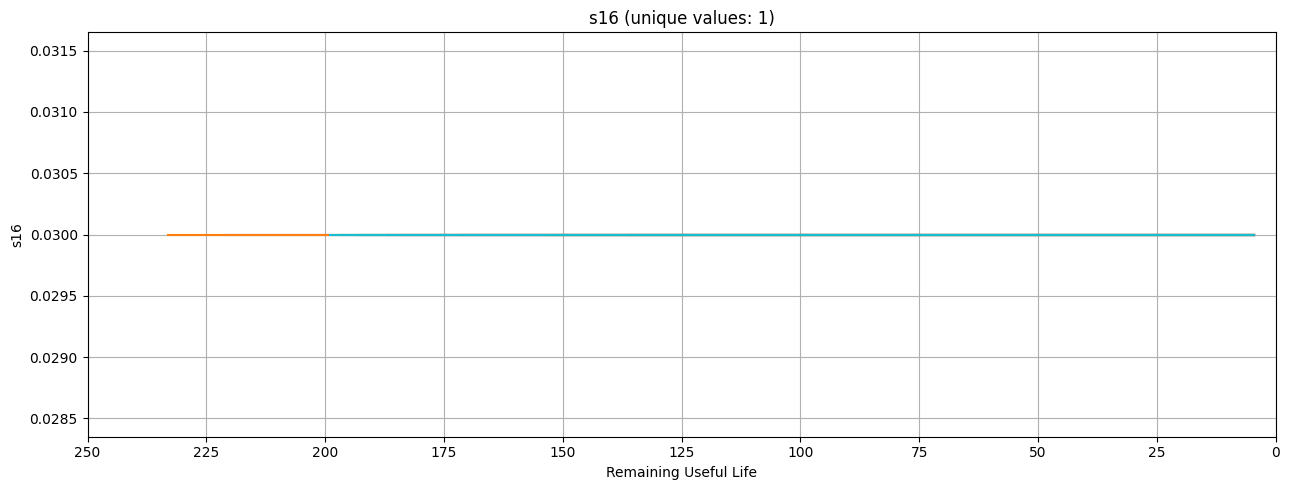

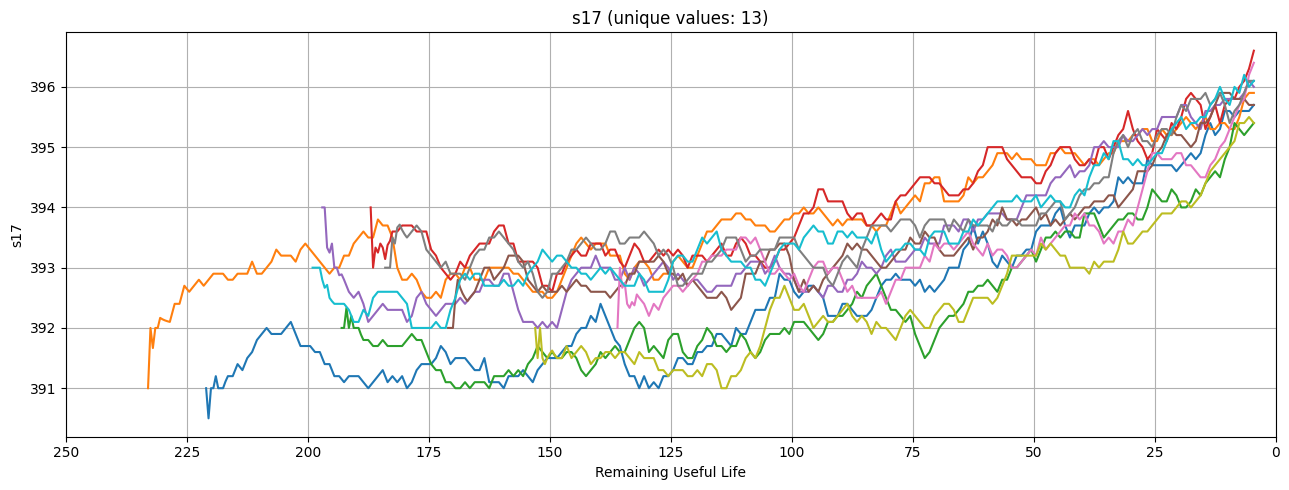

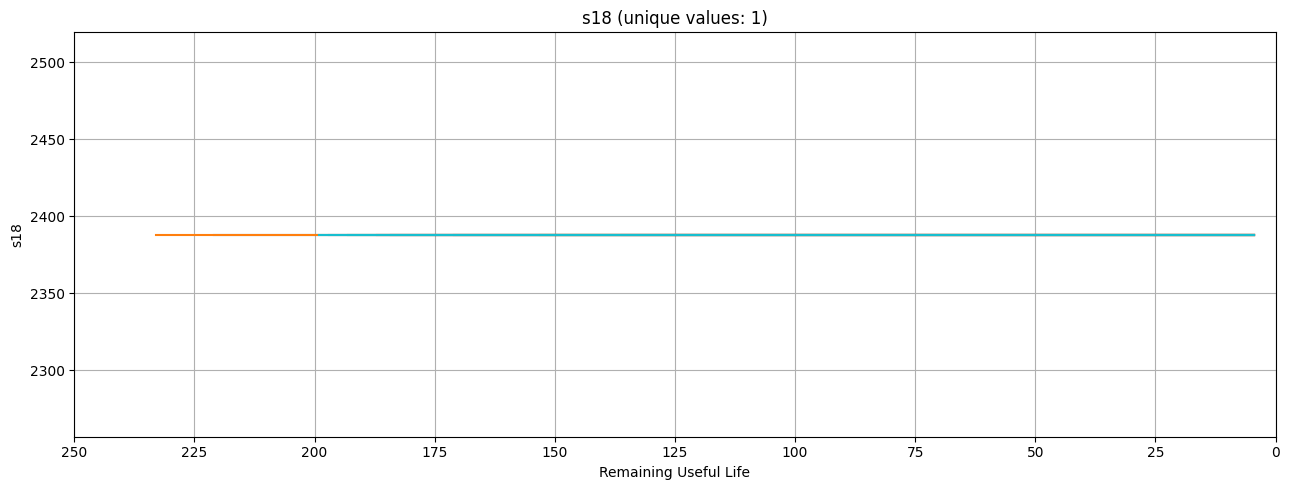

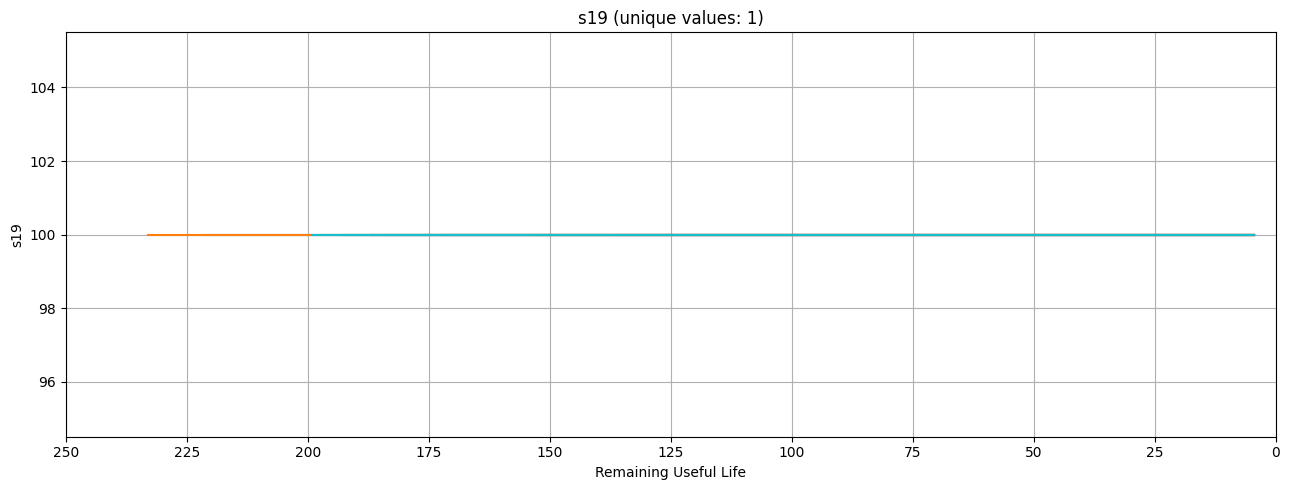

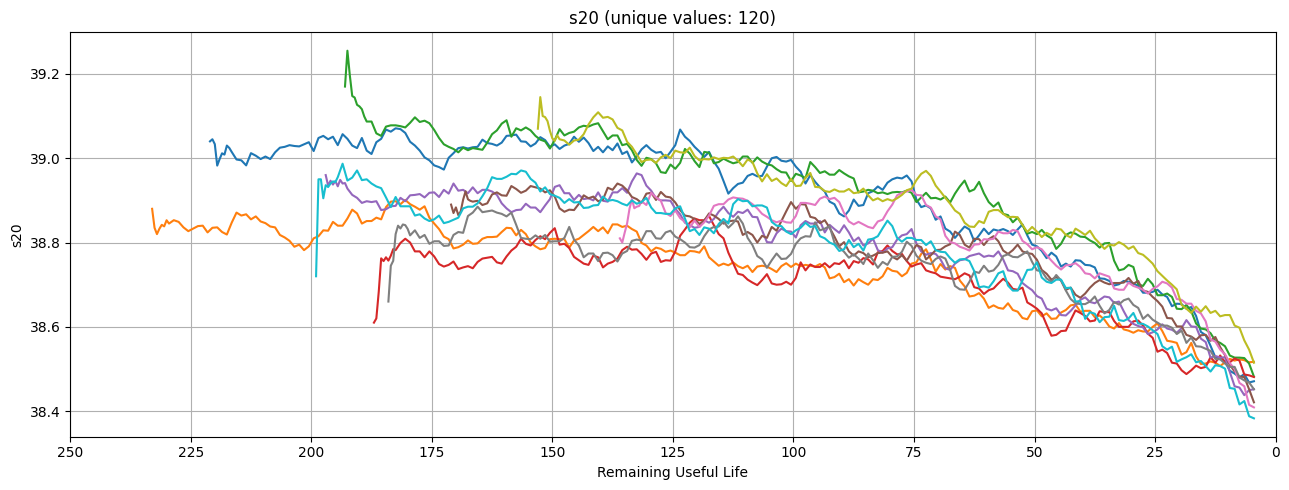

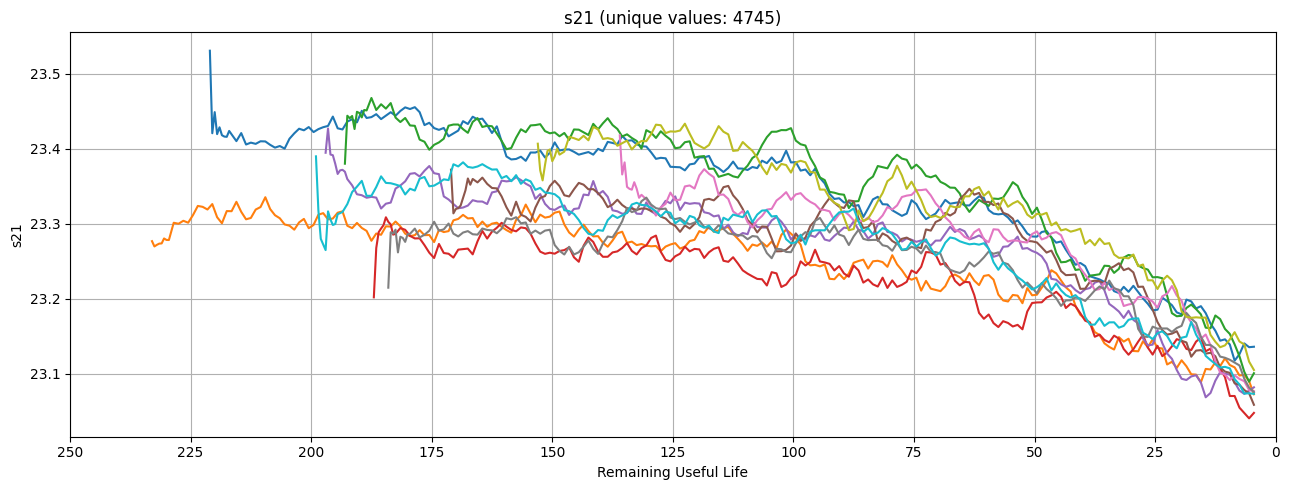

In [4]:
# 1) Add per-row RUL to TRAIN (train ends at failure, so this is true per-row RUL)
train_plot = train.copy()
train_plot["RUL"] = train_plot.groupby("unit")["cycles"].transform("max") - train_plot["cycles"]

# Optional: do the same for TEST, but this is only "cycles remaining until the file ends" (not true RUL)
test_plot = test.copy()
test_plot["RUL"] = test_plot.groupby("unit")["cycles"].transform("max") - test_plot["cycles"]

# 2) A simple label dictionary (since s1..s21 have no human names here)
Sensor_dictionary = {c: c for c in train_plot.columns}

def plot_signal(df, Sensor_dic, signal_name, unit_col="unit", roll_window=10, every_n_units=10, max_rul=250):
    plt.figure(figsize=(13, 5))

    for u in sorted(df[unit_col].unique()):
        if u % every_n_units == 0:  # plot only every 10th unit for readability
            d = df[df[unit_col] == u].sort_values("cycles")
            d_roll = d.rolling(roll_window, min_periods=1).mean(numeric_only=True)
            plt.plot(d_roll["RUL"], d_roll[signal_name])

    # reverse the x-axis so RUL counts down to zero
    # if your max RUL is bigger than max_rul, increase max_rul (e.g., 400)
    plt.xlim(max_rul, 0)
    plt.xticks(np.arange(0, max_rul + 1, 25))

    plt.ylabel(Sensor_dic.get(signal_name, signal_name))
    plt.xlabel("Remaining Useful Life")
    plt.title(f"{signal_name} (unique values: {df[signal_name].nunique()})")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 3) Plot op settings + all sensors (1..21)
cols_to_plot = ["op_setting1", "op_setting2", "op_setting3"] + [f"s{i}" for i in range(1, 22)]

# TRAIN plots (true per-row RUL)
for col in cols_to_plot:
    try:
        plot_signal(train_plot, Sensor_dictionary, col, max_rul=250)
    except Exception:
        pass

# TEST plots (optional, uses "time remaining in file" instead of true RUL)
# for col in cols_to_plot:
#     try:
#         plot_signal(test_plot, Sensor_dictionary, col, max_rul=250)
#     except Exception:
#         pass


In [8]:
train.drop(['s1', 's5', 's10', 's16', 's18', 's19', 'op_setting3'], axis=1, inplace=True)
test.drop(['s1', 's5', 's10', 's16', 's18', 's19', 'op_setting3'], axis=1, inplace=True)

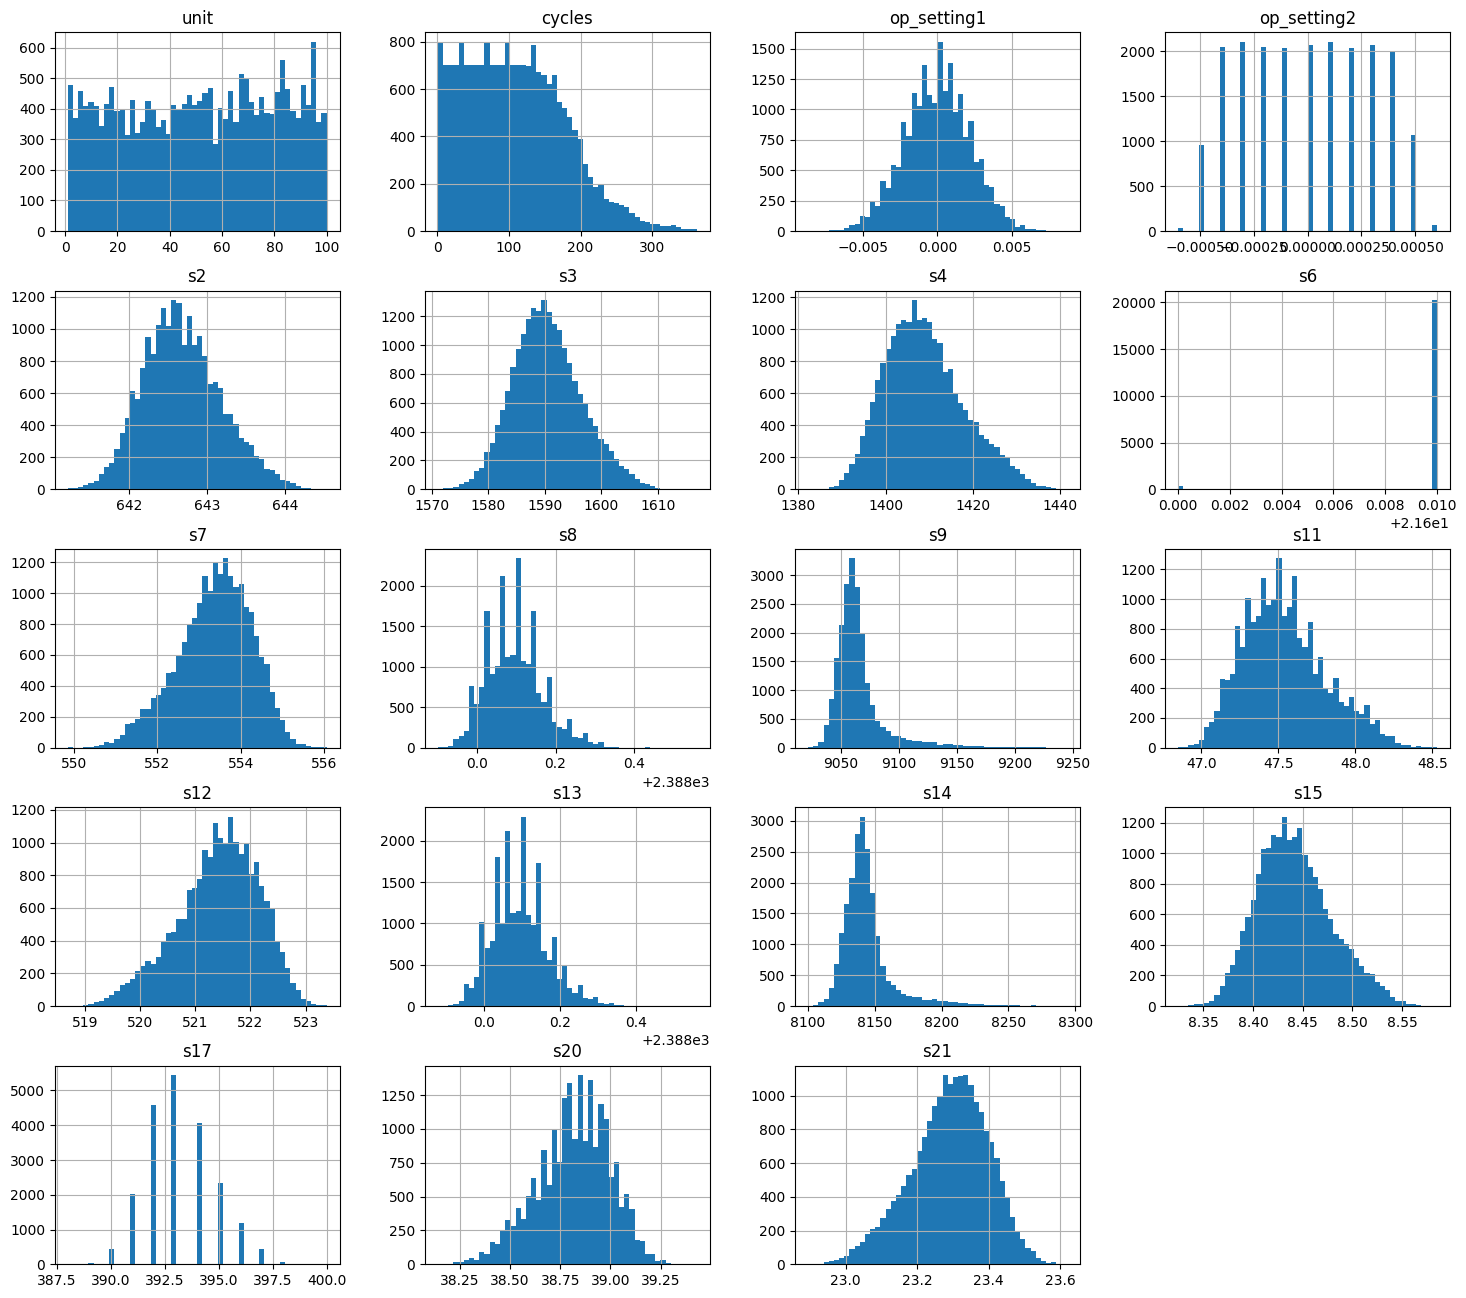

In [12]:
train.hist(bins=50, figsize=(18,16))
plt.show()

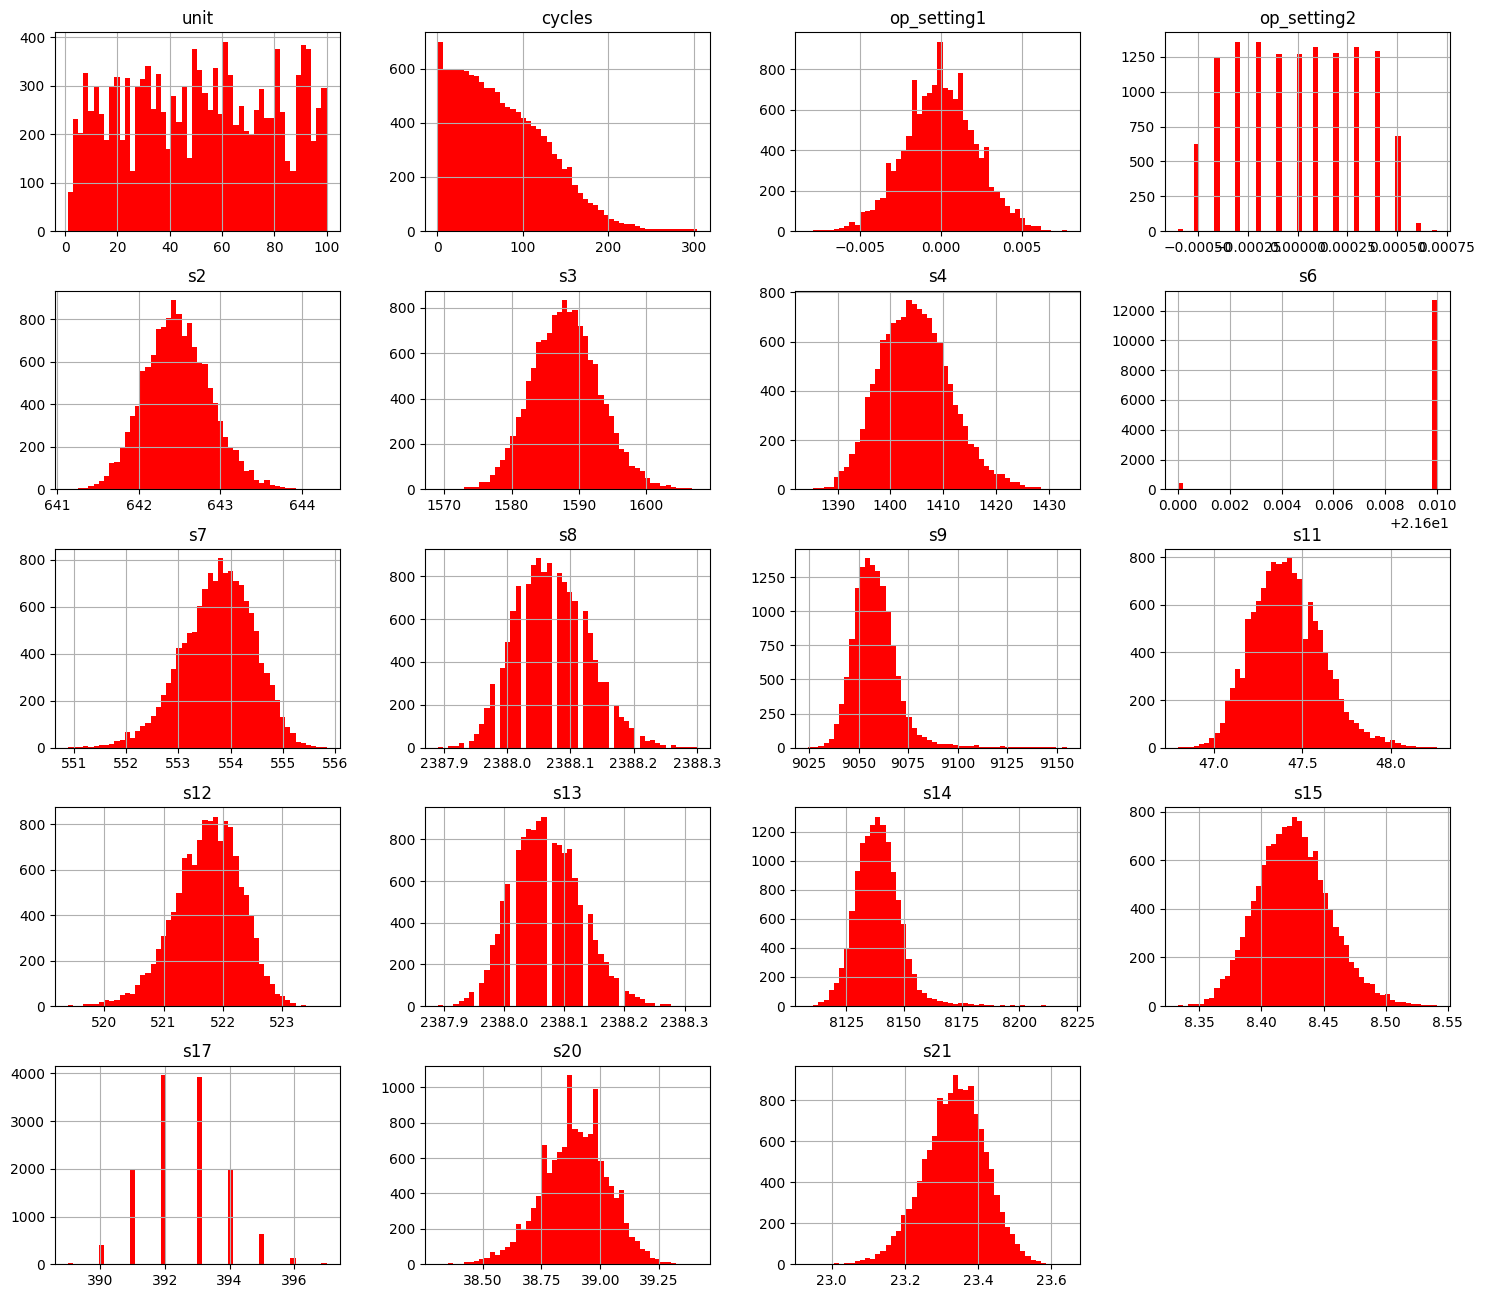

In [13]:
test.hist(bins=50, figsize=(18,16), color="red")
plt.show()

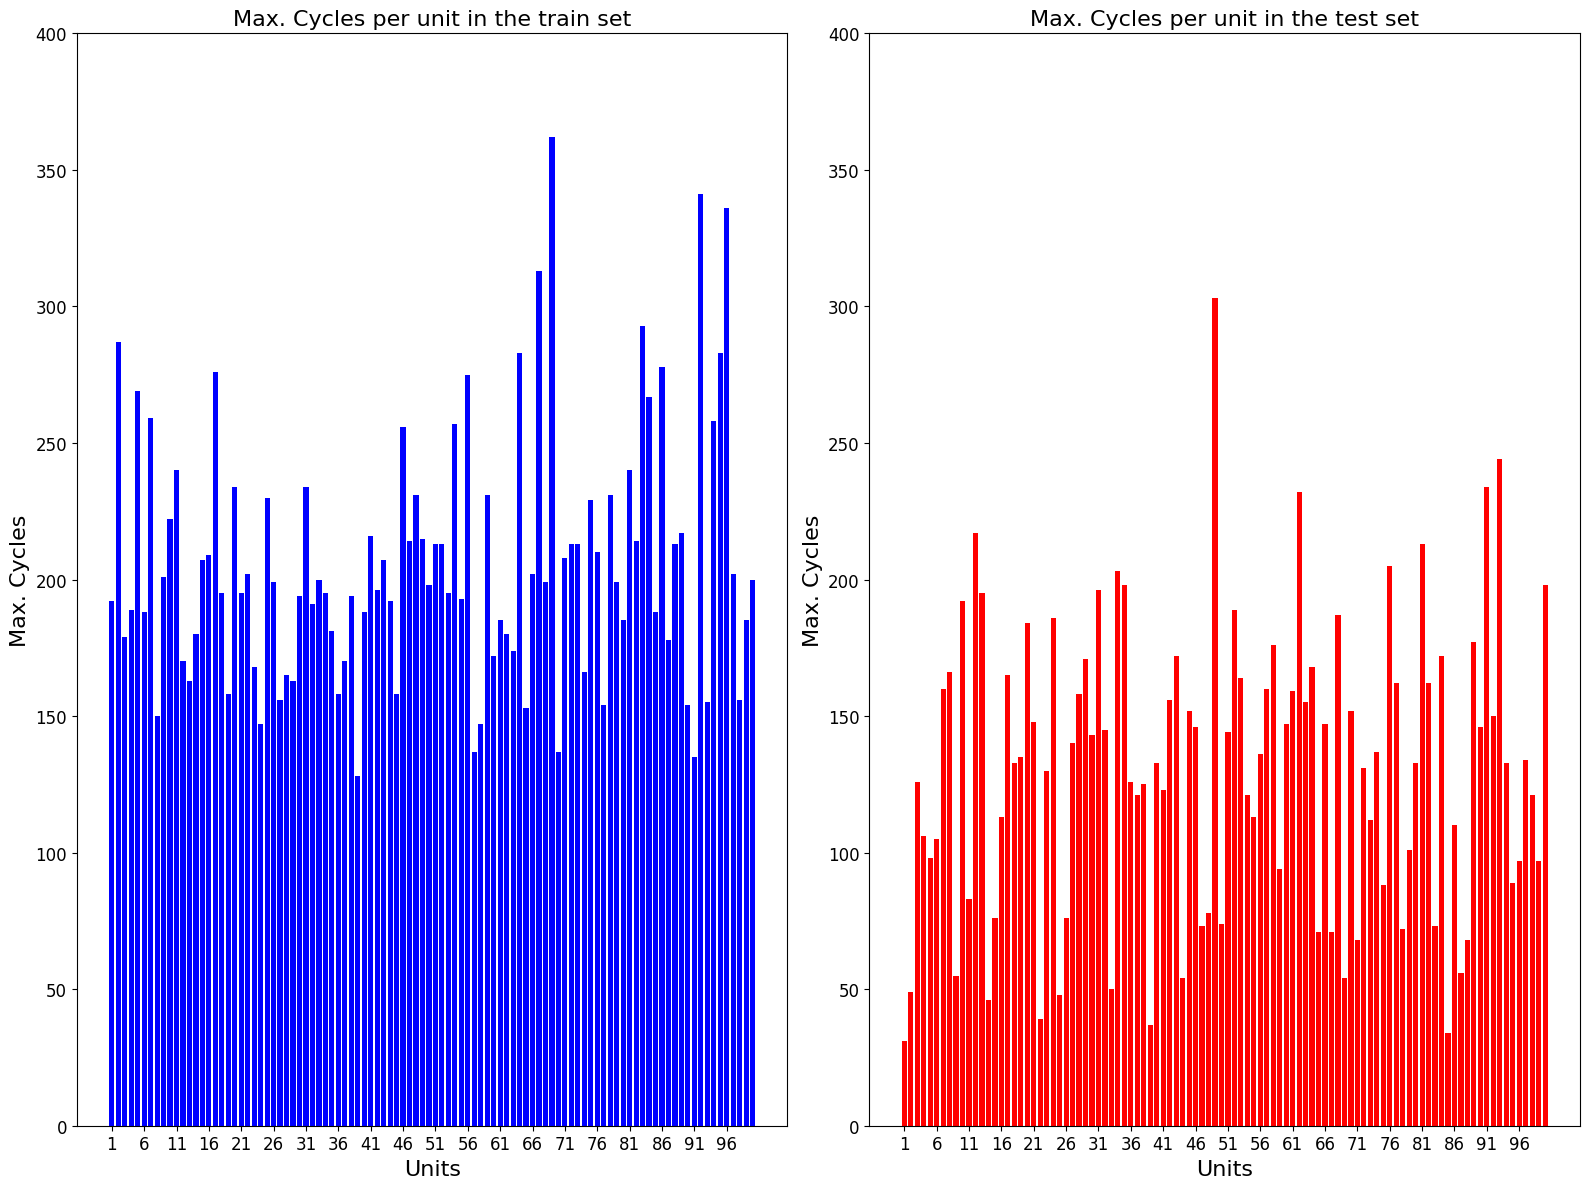

In [26]:
cyclestrain = train.groupby('unit', as_index=False)['cycles'].max()
cyclestest  = test.groupby('unit', as_index=False)['cycles'].max()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 12))

# Train plot
ax1.bar(cyclestrain['unit'], cyclestrain['cycles'], color='blue')
ax1.set_ylim(0, 400)
ax1.set_xlabel('Units', fontsize=16)
ax1.set_ylabel('Max. Cycles', fontsize=16)
ax1.set_title('Max. Cycles per unit in the train set', fontsize=16)
ax1.set_xticks(np.arange(cyclestrain['unit'].min(), cyclestrain['unit'].max() + 1, 5))
ax1.tick_params(axis='both', labelsize=12)

# Test plot
ax2.bar(cyclestest['unit'], cyclestest['cycles'], color='red')
ax2.set_ylim(0, 400)
ax2.set_xlabel('Units', fontsize=16)
ax2.set_ylabel('Max. Cycles', fontsize=16)
ax2.set_title('Max. Cycles per unit in the test set', fontsize=16)
ax2.set_xticks(np.arange(cyclestest['unit'].min(), cyclestest['unit'].max() + 1, 5))
ax2.tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()

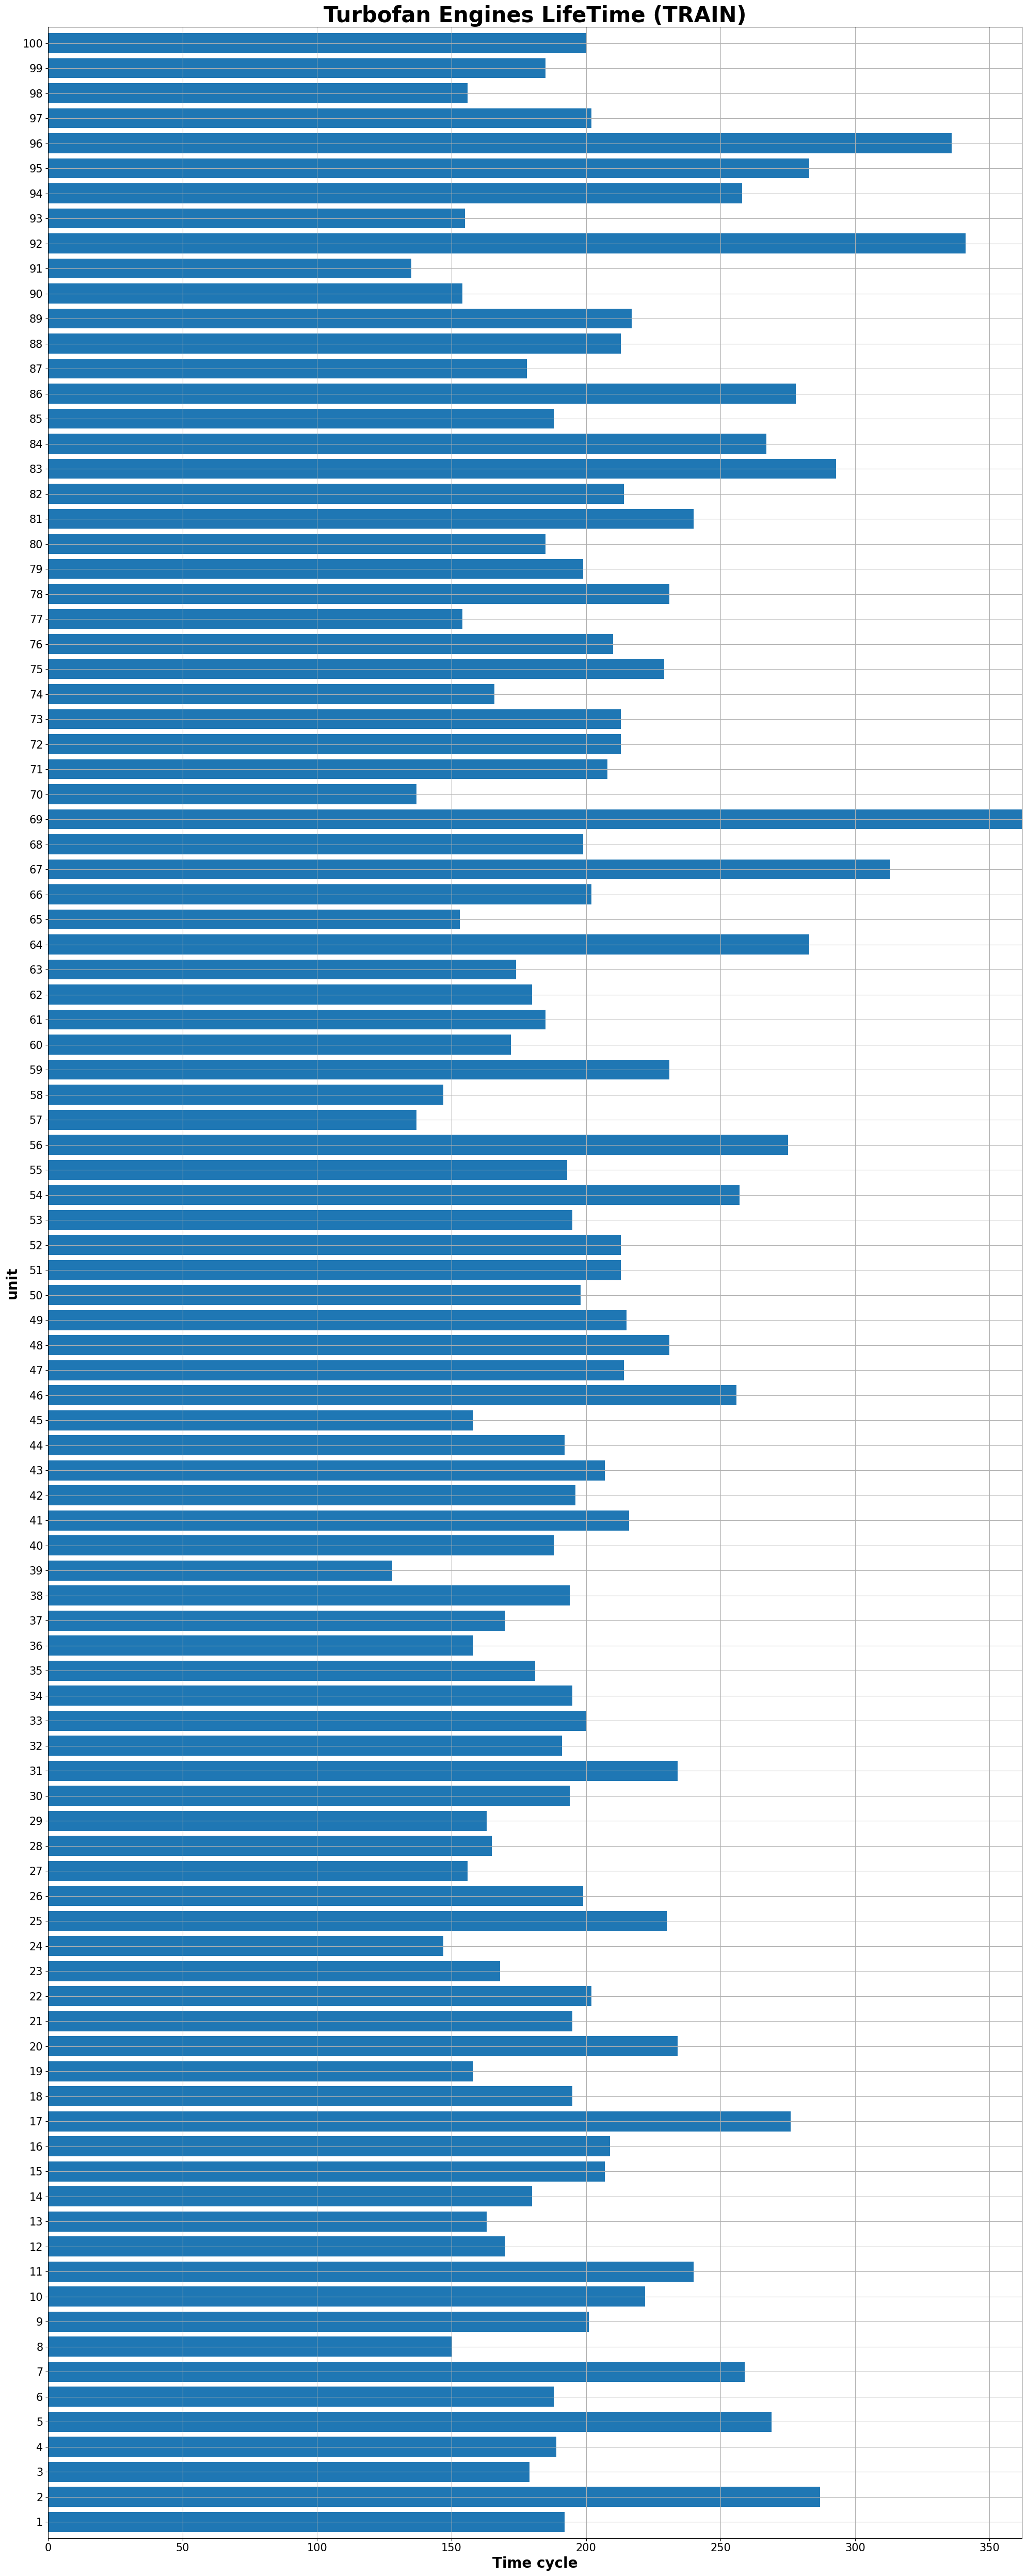

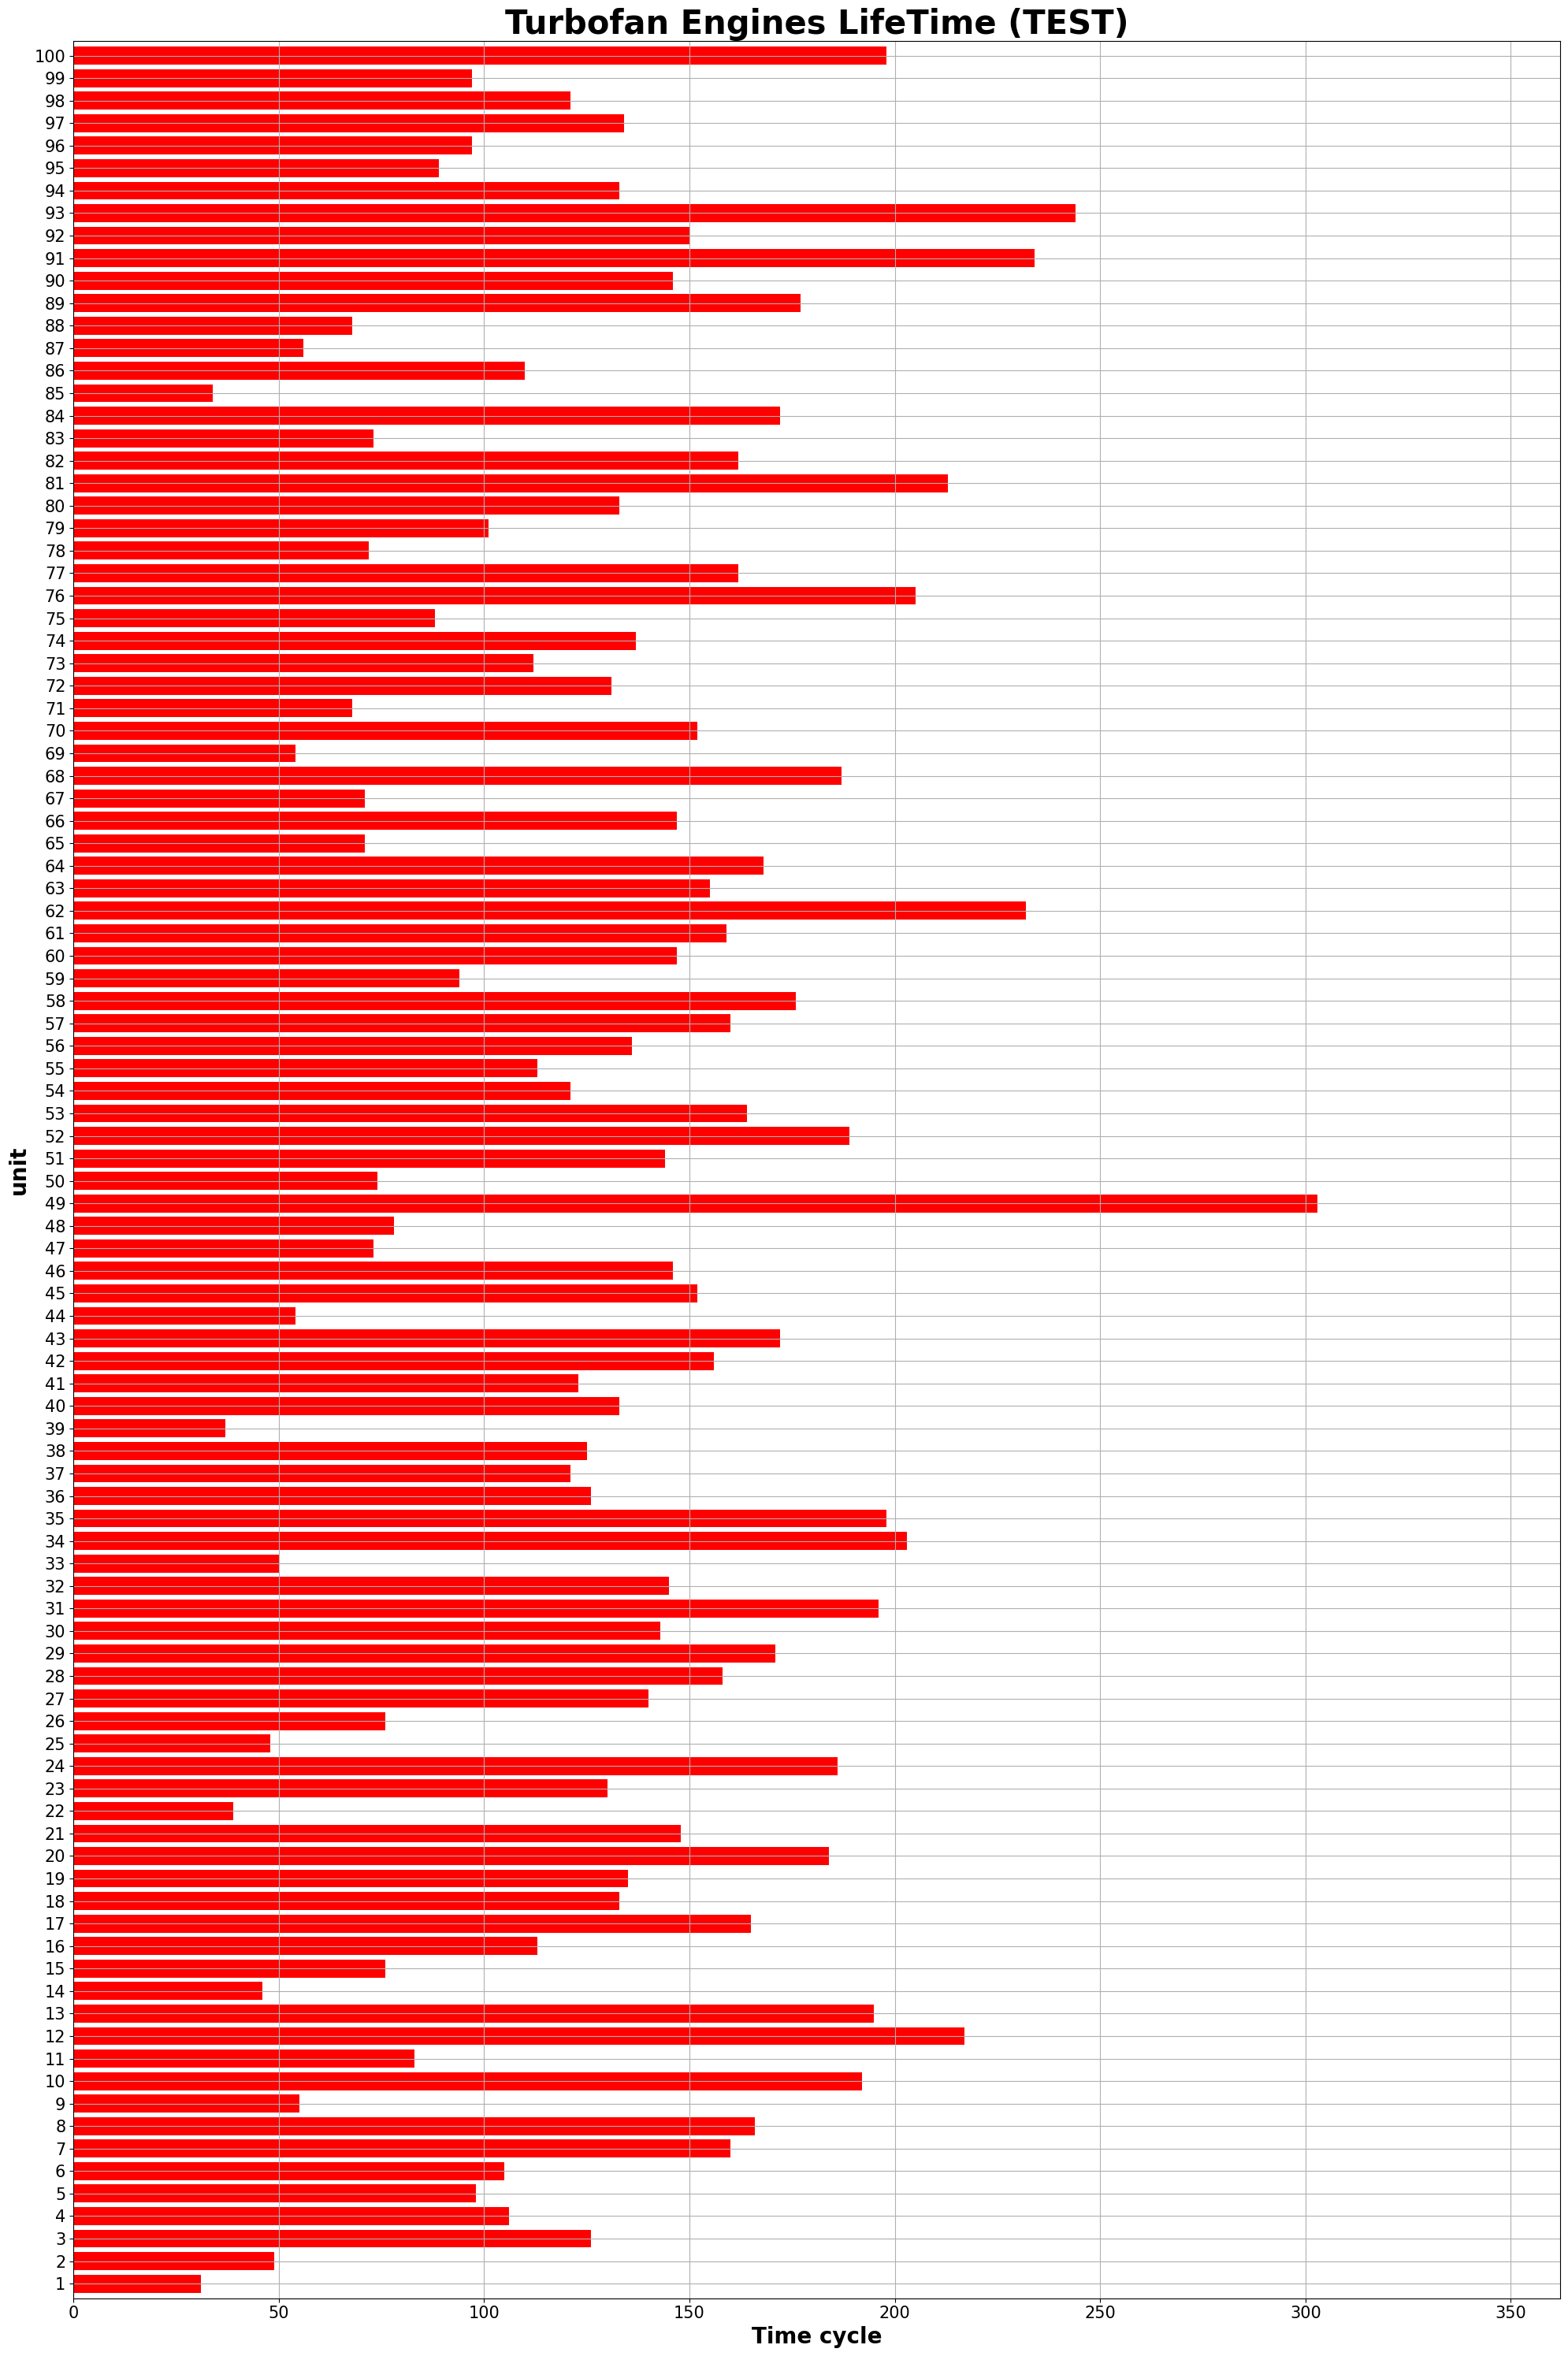

In [27]:
def plot_engine_lifetimes(
    df,
    title,
    unit_col="unit",
    cycle_col="cycles",
    color=None,
    figsize=(20, 50),
    xlim=None
):
    # max observed cycle per unit (lifetime inside this file)
    max_cycles = df.groupby(unit_col)[cycle_col].max()

    # order by unit number (index), not by lifetime value
    max_cycles = max_cycles.sort_index()

    plt.figure(figsize=figsize)
    ax = max_cycles.plot(kind="barh", width=0.8, color=color)

    if xlim is not None:
        plt.xlim(xlim)

    plt.title(title, fontweight="bold", size=30)
    plt.xlabel("Time cycle", fontweight="bold", size=20)
    plt.ylabel("unit", fontweight="bold", size=20)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Use the TRAIN max cycle as a shared x-axis limit so TEST bars look smaller (true comparison).
train_max = train.groupby("unit")["cycles"].max().max()

plot_engine_lifetimes(
    train,
    "Turbofan Engines LifeTime (TRAIN)",
    color=None,
    figsize=(20, 50),
    xlim=(0, train_max),
)

plot_engine_lifetimes(
    test,
    "Turbofan Engines LifeTime (TEST)",
    color="red",
    figsize=(20, 30),      # smaller figure
    xlim=(0, train_max),   # same scale as train
)

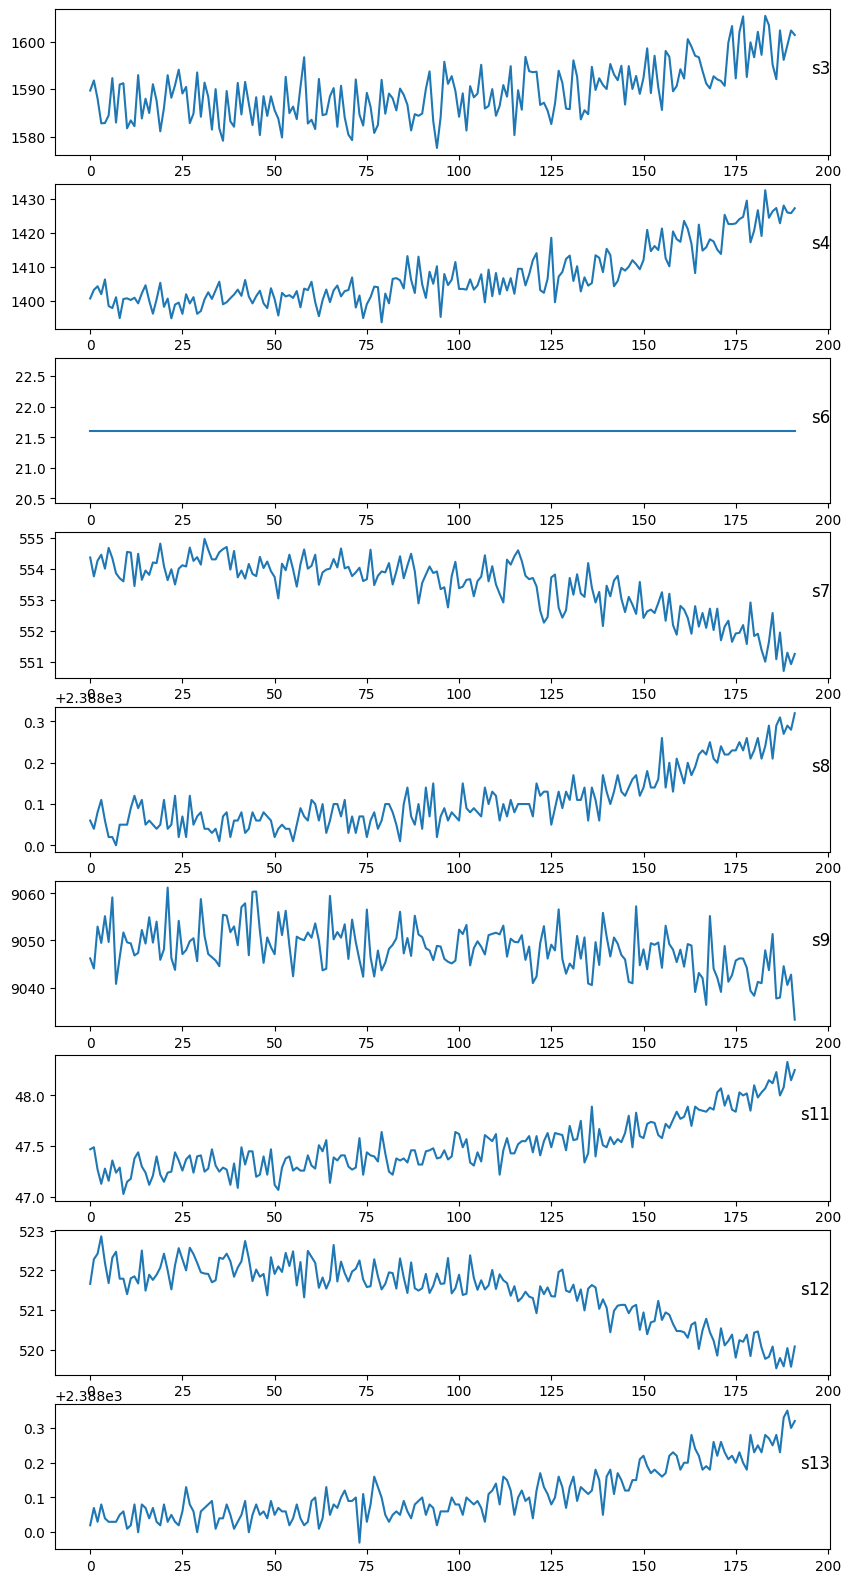

In [9]:
values = train[train.unit==1].values
groups = [5, 6, 7, 8, 9, 10, 11,12,13]
i = 1
plt.figure(figsize=(10,20))
for group in groups:
 plt.subplot(len(groups), 1, i)
 plt.plot(values[:, group])
 plt.title(train.columns[group], y=0.5, loc='right')
 i += 1
plt.show()

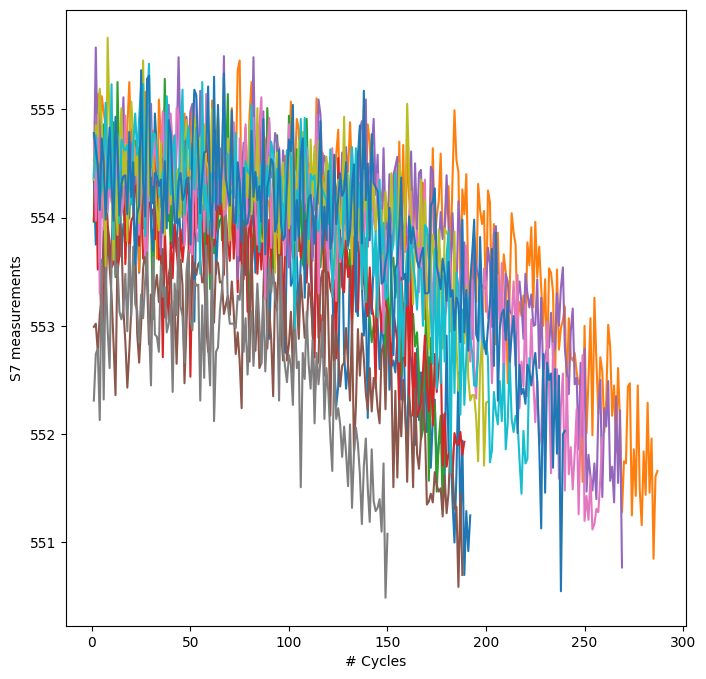

In [11]:
plt.figure(figsize = (8, 8))
plt.plot(train[train.unit==1].cycles, train[train.unit==1].s7)
plt.plot(train[train.unit==2].cycles, train[train.unit==2].s7)
plt.plot(train[train.unit==3].cycles, train[train.unit==3].s7)
plt.plot(train[train.unit==4].cycles, train[train.unit==4].s7)
plt.plot(train[train.unit==5].cycles, train[train.unit==5].s7)
plt.plot(train[train.unit==6].cycles, train[train.unit==6].s7)
plt.plot(train[train.unit==7].cycles, train[train.unit==7].s7)
plt.plot(train[train.unit==8].cycles, train[train.unit==8].s7)
plt.plot(train[train.unit==9].cycles, train[train.unit==9].s7)
plt.plot(train[train.unit==10].cycles, train[train.unit==10].s7)
plt.plot(train[train.unit==11].cycles, train[train.unit==11].s7)
plt.xlabel('# Cycles')
plt.ylabel('S7 measurements')
plt.show()

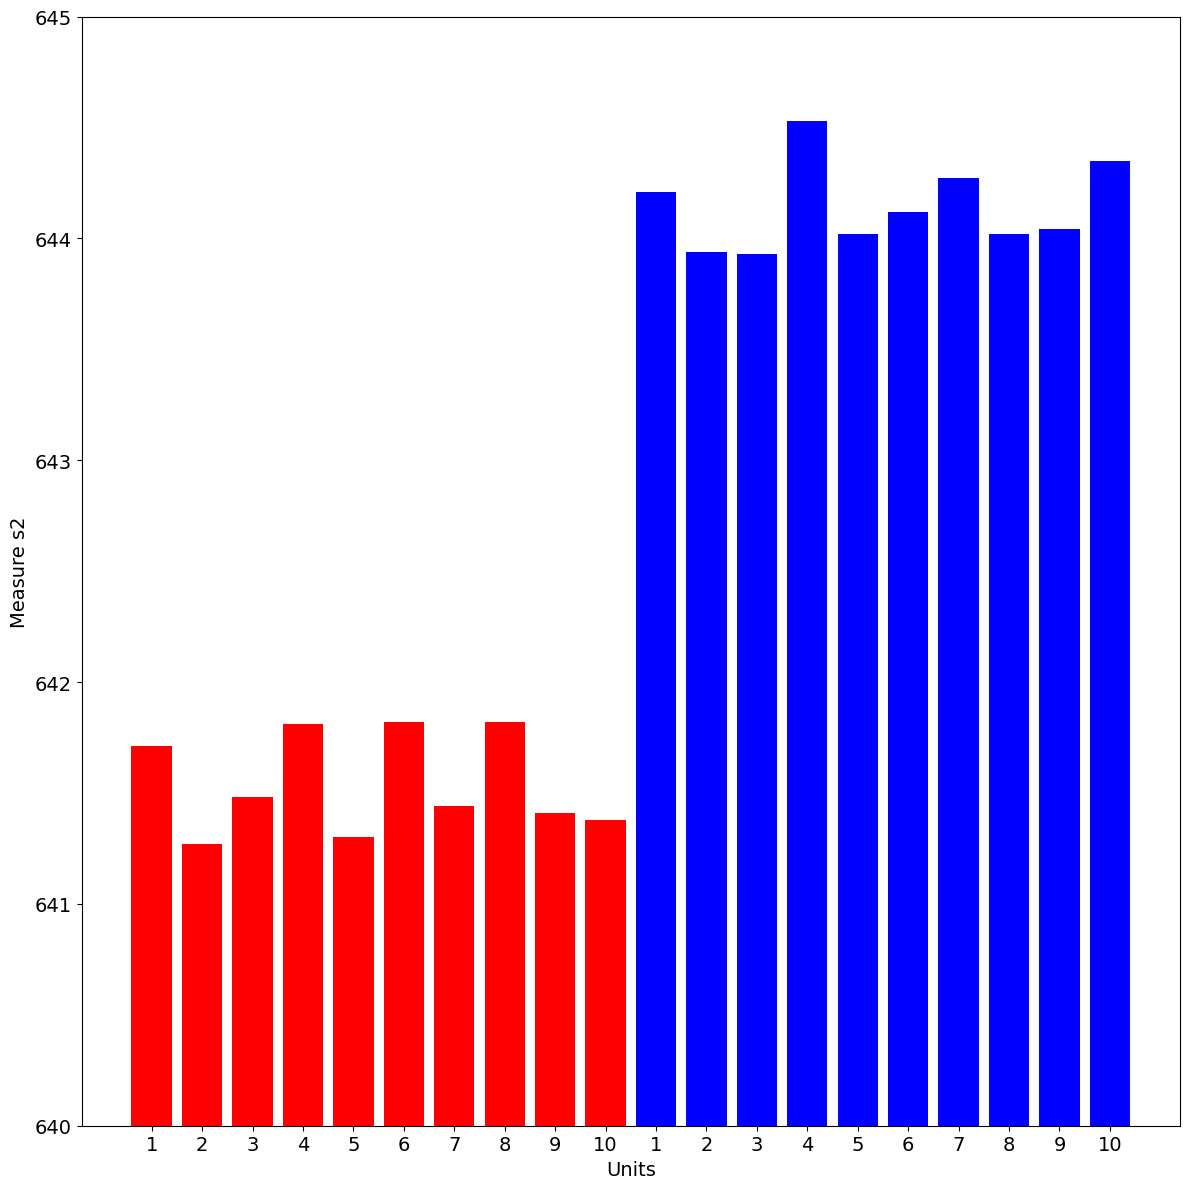

In [16]:
minb = train.groupby('unit', as_index=False).min().head(10)
maxb = train.groupby('unit', as_index=False).max().head(10)

mmtable = pd.concat([minb, maxb], ignore_index=True)

plt.figure(figsize=(12, 12))

col = np.concatenate((np.repeat('red', 10), np.repeat('blue', 10)), axis=0)

bar_labels = list(mmtable['unit'])
x_pos = list(range(len(bar_labels)))

plt.bar(x_pos, mmtable['s2'], color=col)
plt.ylim([640, 645])
plt.xlabel('Units', fontsize=14)
plt.ylabel('Measure s2', fontsize=14)
plt.xticks(x_pos, bar_labels, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()